[박현우] 간단한 클러스터링 예제
========================

이 노트북에서는 클러스터링을 하는 방식을 간단하게 다뤄봅니다.

In [1]:
%matplotlib inline
from IPython.display import display, HTML

import matplotlib
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **krfont)

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [3]:
from multiprocessing import Pool
import multiprocessing

cores = multiprocessing.cpu_count()

In [4]:
chosun_data = pd.read_pickle("chosun_news.df")

0. 테스트 데이터 추출
----------------

In [5]:
test_categories = [
    '스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구',
    '국제 > 유럽',
    '사회 > 의료ㆍ보건',
    '정치 > 외교',
    '문화 > 전시ㆍ공연 > 공연',
    '경제 > 증권ㆍ금융',
    '경제 > IT',
    '스포츠ㆍ연예 > 스포츠 > 리우올림픽',
    '사회 > 교육ㆍ시험 > 대학입시',
]

chosun_data = chosun_data[['category', 'publishedAt', 'title', 'content']]

chosun_test_data = [chosun_data[chosun_data.category == category] for category in test_categories]
for category, test_data in zip(test_categories, chosun_test_data):
    print('%d : %s' % (len(test_data), category))
test_chosun_data = pd.concat(chosun_test_data).sample(frac=1)  # Shuffle

265 : 스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구
349 : 국제 > 유럽
474 : 사회 > 의료ㆍ보건
435 : 정치 > 외교
195 : 문화 > 전시ㆍ공연 > 공연
103 : 경제 > 증권ㆍ금융
123 : 경제 > IT
394 : 스포츠ㆍ연예 > 스포츠 > 리우올림픽
103 : 사회 > 교육ㆍ시험 > 대학입시


In [6]:
test_chosun_data

,category,publishedAt,title,content
42896,사회 > 의료ㆍ보건,2016-01-28 03:00:00,"불법 '사무장 병원', 健保 진료비 7년간 1조 챙겨",비의료인(사무장)이 불법으로 '바지 의사'를 내세워 병원을 설립·운영하는 이른바 '...
32950,국제 > 유럽,2016-03-18 03:00:00,"영국, 설탕稅 도입하기로",영국이 어린이 비만을 줄이기 위해 설탕이 들어간 청량음료에 대해 1L 당 최대 24...
52402,국제 > 유럽,2015-12-11 03:00:00,"탈북자 소재 연극, 英 FT 별 4개 호평",탈북자를 소재로 재미 한인 2세가 쓴 연극 'You for me for you(당신...
122717,국제 > 유럽,2016-10-03 03:00:00,"""EU탈퇴 협상 내년 3월 시작""… 英 메이, 청사진 공개","테리사 메이 영국 총리는 2일(현지 시각) ""내년 3월 말까지 (EU 탈퇴 절차를 ..."
21978,사회 > 의료ㆍ보건,2016-05-13 03:00:00,동원 참치캔에서 이물질 발견… 유통·판매 금지,동원 참치 일부 캔에서 검은색 이물질이 나온다는 신고가 들어와 유통·판매 금지 조처...
63554,스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구,2015-10-20 03:00:00,"웃음 터진 공룡, 살아난 공격 DNA",안방에서 거둔 첫 '가을 야구' 승리였다.\n\nNC가 19일 창원 마산구장에서 열...
49225,국제 > 유럽,2015-12-26 03:00:00,세계 7대 불가사의 '헬리오스 巨像' 다시 세운다,고대 세계 7대 불가사의 중 하나인 그리스의 헬리오스 거상(巨像·콜로서스)을 다시 ...
8090,스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구,2016-08-01 03:00:00,"KIA, 6연승 찍고 4위로 올라",프로야구 KIA 타이거즈가 6연승 행진을 벌이며 4위로 뛰어올랐다. KIA는 31일...
7724,스포츠ㆍ연예 > 스포츠 > 리우올림픽,2016-08-03 03:15:00,"선수 자신을 위해, 팬들을 위해… SNS에 담긴 리우 각오",리우올림픽이 3일 앞으로 다가왔다. 4년간 땀과 눈물로 올림픽을 준비해온 204명의...
32822,정치 > 외교,2016-03-19 03:00:00,"日, 모든 高校 역사 교과서에 '독도는 일본 땅'",일본 고등학교 교과서의 일본사 과목에 '독도는 일본 땅'이라는 내용이 빠짐없이 기술...


In [7]:
chosun_data['title'].sample(50).tolist()

['노인만 남아있는 섬에 天國을 만들고 싶었다',
 '[알립니다] 마이너스 시대 경영 리더십은?',
 '"北核, 압박 외 선택지 없어", "중국의 北설득 정책은 실패"',
 '[내 인생의 100℃] "한 우물 60년… 그중에 깊은 맛 알려준 영화"',
 '[오늘의 운세] 3월 27일 일요일(음력 2월 19일 戊申)',
 'JLPGA 첫 메이저 대회 박성현 1라운드 공동 8위',
 "[이번주 개봉영화딱 10자평] '빅쇼트' 외",
 "[이진희의 날씨 레터] '효자 장마'",
 '[카드뉴스] 나이키 신발에 주먹질하는 애국심',
 "8월 북중교역 30% 급증… 커지는 '中 구멍'",
 '[내일의 경기] 2015년 12월 13일',
 '뒤늦은 기초연금 반납… 前공무원 불만',
 '"내 생애 최고의 영예는 金韓守"',
 "수염 특징 따라 회전 '센서기능' 탑재",
 "출시 8년 만에 85만 세트 판매 '단일 교구 최다'",
 '[데스크에서] 株價가 보내는 이상 신호',
 "구석기부터 조선까지… 1층만 봐도 '수능 한국史' 완전정복",
 '[스피킹이 강해지는 영어] The way I see it, ~',
 '11개째 치아 빠진 문재인',
 '[오늘의 경기] 2016년 7월 18일',
 '전국 24개 체인 이용… 회원 우선 예약, 20박 숙박 혜택도',
 '[Weekly BIZ] 서로 비난하는 직원 똘똘 뭉치게 하려면? 공동의 목표 줘라',
 '2연승 트럼프 "승리는 아름답다"… 젭 부시, 도중하차',
 '[사설] 조폭과 어울려 도박한 프로야구 선수는 영구 퇴출시켜야',
 '"배신의 경제 심판"',
 '현대車 4년 연속 파업… "23~25일 부분파업 시작"',
 '[부음] 민용식 前 한국OB축구회장 별세 외',
 "중국판 실리콘밸리 '중관춘'… 외국인 학생 창업 쉬워진다",
 '공무원 연금, 이혼하면 반쪽',
 '[Why] 유디치과와 치협 4년 전쟁의 내막',
 "눈 큰 아이의 '우주 여행'",
 '[더 나은 미래] "\'1000만벌의 도움\'에 동참하려고 왔어요"',
 

1. Corpus 로딩하기
---------------------

In [8]:
from konlpy.tag import Mecab, Hannanum, Twitter
mecab = Mecab()
hannanum = Hannanum()
twitter = Twitter()

In [9]:
import re, hanja
import numba

def tokenizeText(text):
    text = ' '.join(hanja.split_hanja(text))
    text = hanja.translate(text, 'substitution')
    return mecab.nouns(text)

print(tokenizeText('[사설] 美가 증거 내밀자 수사 나선 中 이중 플레이'))

['사설', '미', '증거', '수사', '나선', '중', '이중', '플레이']


In [10]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)

In [ ]:
from gensim import corpora

In [ ]:
words = []
# using mecab
with Pool(cores) as p:
    words = list(tqdm(p.imap(tokenizeText, chosun_data['content']), total=len(chosun_data)))
# words = [tokenizeText(text) for text in tqdm(chosun_data['content'])]
dictionary = corpora.Dictionary(words)

2. Doc2Vec를 이용한 문서->벡터 변환
------------------------------

In [12]:
from gensim.models import Doc2Vec
import gensim.models.doc2vec
from collections import OrderedDict
assert gensim.models.doc2vec.FAST_VERSION > -1, "this will be painfully slow otherwise"

In [13]:
doc2vec_model = Doc2Vec(dm=0, size=64, negative=5, hs=0, min_count=2, workers=cores)

In [14]:
import random

sentences = [gensim.models.doc2vec.LabeledSentence(
        words=words, tags=[i])
        for i, words in enumerate(words)]
tmp = [(i, sentence) for i, sentence in enumerate(sentences)]
random.shuffle(tmp)
train_set = [x[1] for x in tmp[:len(tmp) * 3 // 10]]

In [15]:
doc2vec_model.build_vocab(train_set)

In [16]:
def getDocument(docID):
    cate, title = chosun_data[['category', 'title']].iloc[docID]
    return "[%s] %s" % (cate, title)

In [17]:
alpha, min_alpha, passes = (0.025, 0.001, 50)
alpha_delta = (alpha - min_alpha) / passes
currentPass = 0

In [32]:
iter_pass = 10

for epoch in tqdm(range(iter_pass)):
    if currentPass == passes:
        print('Maximum iteration')
        break
    
    print("(alpha=%.6f) [%d/%d] Training %d/%d" % (alpha, epoch + 1, iter_pass, currentPass + 1, passes))
    doc2vec_model.alpha = doc2vec_model.min_alpha = alpha
    doc2vec_model.train(train_set)
    alpha -= alpha_delta
    currentPass += 1


(alpha=0.010600) [1/10] Training 31/50
(alpha=0.010120) [2/10] Training 32/50
(alpha=0.009640) [3/10] Training 33/50
(alpha=0.009160) [4/10] Training 34/50
(alpha=0.008680) [5/10] Training 35/50
(alpha=0.008200) [6/10] Training 36/50
(alpha=0.007720) [7/10] Training 37/50
(alpha=0.007240) [8/10] Training 38/50
(alpha=0.006760) [9/10] Training 39/50
(alpha=0.006280) [10/10] Training 40/50



In [33]:
doc_id = np.random.randint(chosun_data['title'].count())
print(doc_id, getDocument(doc_id))
sims = doc2vec_model.docvecs.most_similar(doc_id, topn=10)

for i, sim in enumerate(sims[:10]):
    print('#%04d (%4d, %.5f) : %s' % (i, sim[0], sim[1], getDocument(sim[0])))

24363 [스포츠ㆍ연예 > 스포츠 > 종합 > 동계] 내년 고속철 개통… 수도권서 1시간대로
#0000 (14915, 0.46477) : [사회 > 교육ㆍ시험 > 생활한자] [신문으로 배우는 실용한자] 선영(先塋)
#0001 (24273, 0.45563) : [경제 > 유통ㆍ소비자] 유리밀폐용기로 '세계일류상품' 5년 연속 선정
#0002 (9962, 0.41943) : [사설ㆍ칼럼 > 내부칼럼] [2030 프리즘] 유모차 밀어봐야 보이는 것
#0003 (39118, 0.41508) : [사회 > 법원ㆍ검찰ㆍ경찰] [땅, 땅… 오늘의 판결] 한미연합사 용산 잔류는 통치행위"
#0004 (26477, 0.41397) : [사회 > 교육ㆍ시험 > 일본어] [입에 착착 붙는 일본어] ~이 돌연 폭로되다
#0005 (27425, 0.41066) : [스포츠ㆍ연예 > 스포츠 > 종합 > 바둑] [제20회 LG배 조선일보 기왕전] '3분의 1 勝'
#0006 (15943, 0.40732) : [국제 > 아시아] 마오쩌둥처럼… 軍 휘어잡은 시진핑
#0007 (10113, 0.40629) : [문화 > 전시ㆍ공연 > 공연] 코앞서 볼까요, 넓은 무대 즐길까요
#0008 (17597, 0.40117) : [정치 > 국회ㆍ정당] 與돈풀기 野빚탕감 모두 금융시장에 毒될수도
#0009 (15255, 0.40088) : [사설ㆍ칼럼 > 내부칼럼 > 데스크에서] [데스크에서] 정치판, 양궁에서 배워라


* paragraph2vec의 알고리즘에서 word2vec를 쓴다.
* Word2Vec은 전체 뉴스에 대해서 하는게 어떤가. 너무 word/content 갯수가 적지 않은가.
* 전처리 과정이 필요한가?

In [34]:
doc2vec_model.save("model.doc2vec")

3. sklearn을 이용한 Agglomerative Clustering
------------------------------------------

In [133]:
content_vectors = []
for i, sentence in enumerate(tqdm_notebook(sentences)):
    v = doc2vec_model.infer_vector(sentence.words)
    content_vectors.append(v)
content_vectors = np.asarray(content_vectors)

In [134]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering, MeanShift

In [167]:
cluster_num = 50
cluster_model = AgglomerativeClustering(n_clusters=cluster_num, linkage="average", affinity='cosine')
# cluster_model = DBSCAN(eps=.30, min_samples=3, metric='cosine', algorithm='brute')
# cluster_model = KMeans(n_clusters=cluster_num)
# cluster_model = SpectralClustering(n_clusters=cluster_num, affinity='cosine')
# cluster_model = MeanShift(n_jobs=cores)
cluster_model.fit(content_vectors)

cluster_num = len(set(cluster_model.labels_)) - (1 if -1 in cluster_model.labels_ else 0)
print('# of clusters : %d' % cluster_num)
if -1 in cluster_model.labels_:
    noiseNum = np.sum(cluster_model.labels_ == -1)
    totNum = len(content_vectors)
    print('Noise : %d/%d (%.2f%%)' % (noiseNum, totNum, noiseNum / totNum * 100))

# of clusters : 50


In [171]:
import gc
print('# of collected objects :', gc.collect())

# of collected objects : 0


In [172]:
cluster_data = []
for cluster_index in range(cluster_num):
    cluster_data.append(chosun_data[cluster_model.labels_ == cluster_index])

In [173]:
for i, d in enumerate(cluster_data):
    print('Cluster %d' % (i + 1))
    
    # Get important words
    vectors = content_vectors[cluster_model.labels_ == i]
    average = np.mean(vectors, axis=0)
    # words = doc2vec_model.most_similar([average], topn=10)
    # print(words)
    sims = doc2vec_model.docvecs.most_similar([average], topn=5)

    for i, sim in enumerate(sims[:10]):
        print('#%04d (%4d, %.5f) : %s' % (i, sim[0], sim[1], getDocument(sim[0])))

    display(d[['title', 'category']].sample(min(10, len(d))))
    print('\n\n')

Cluster 1
#0000 (8109, 0.69299) : [문화 > 전시ㆍ공연 > 전시] 신라 금관 빼닮은 '아프간 금관' 한국 왔다
#0001 (9539, 0.67833) : [문화 > 전시ㆍ공연 > 전시] 活字 5만점 펼쳐졌다, 활자의 나라 조선이 펼쳐졌다
#0002 (33111, 0.67352) : [문화 > 전시ㆍ공연 > 전시] 일본서 돌아온 한국 瓦塼을 보다
#0003 (32840, 0.67264) : [문화] 고구려 승려 담징이 그렸다고 전해지는… 日, 호류지 금당벽화 첫 정밀조사
#0004 (18358, 0.67219) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 임시정부 수립일, 이젠 바로잡아야


,title,category
65244,"[미술 소식] 갤러리 도스, 김지훈 개인전 외",문화 > 전시ㆍ공연 > 전시
27053,"서울, 2000년 품은 역사 도시",문화 > 전시ㆍ공연 > 전시
4351,"[문화 소식] 클라리네티스트 조성호, 도쿄필 수석 외",문화
4483,[김기봉의 히스토리아 쿠오바디스] [10] '新 냉전 격전지' 한반도,사설ㆍ칼럼 > 외부칼럼 > 김기봉의 히스토리아
33441,"""삼국시대 소형 금동불 양식, 중국에 역수출""",문화 > 종교ㆍ학술
38890,"""草蟲圖 300점, 사임당의 그림이란 확증 없다""",문화
18127,조선 비행기 '飛車' 다시 날린 남자,사회 > 인물 > 사람들
58989,"""한국은 자유·평등 유전자 지닌 위대한 나라""",문화
21249,"[발자취] 학도병, 7選의원, '샘터' 창간… 몸으로 쓴 현대史",사회 > 인물 > 사람들
4186,한일포럼賞에 故 와카미야 前 아사히신문 주필,사회 > 인물 > 사람들





Cluster 2
#0000 (35309, 0.80520) : [사회 > 날씨] [오늘의 날씨] 2015년 10월 19일
#0001 (36364, 0.79413) : [사회 > 날씨] [오늘의 날씨] 2015년 10월 9일
#0002 (31930, 0.79048) : [사회 > 날씨] [오늘의 날씨] 2015년 11월 21일
#0003 (17206, 0.78799) : [사회 > 날씨] [오늘의 날씨] 2016년 4월 12일
#0004 (22603, 0.78208) : [사회 > 날씨] [오늘의 날씨] 2016년 2월 22일


,title,category
32909,[태평로] 한강에 자전거 경찰이 있어야 한다,사설ㆍ칼럼 > 내부칼럼 > 태평로
686,"北 홍수로 138명 사망, 400여명 실종",정치 > 북한
34419,인공지능이 인천공항 지킨다,사회 > 교통ㆍ관광ㆍ항공
13163,[오늘의 날씨] 2016년 7월 1일,사회 > 날씨
4902,"GTX A노선, 파주 운정서 동탄까지 연장",사회 > 교통ㆍ관광ㆍ항공
46831,[오늘의 날씨] 2016년 1월 9일,사회 > 날씨
5078,"서울 강서구 남부순환로, 부천 봉오대로와 8차선 개통",사회 > 교통ㆍ관광ㆍ항공
38496,"달아 달아 밝은 달아, 대보름날 숨으면 어떡하니",사회 > 날씨
58571,비 내리는 13일의 금요일,사회 > 날씨
32590,10여m 차로… 수학여행 비행기 충돌 피했다,사회 > 사건ㆍ사고





Cluster 3
#0000 (37373, 0.70682) : [사회 > 카드뉴스] [카드뉴스] 추석이다! 풍악을 울리자!
#0001 (33073, 0.67433) : [사회 > 카드뉴스] [카드뉴스] 65년 전 약속 "꼭 구하러 다시 올게"
#0002 (9996, 0.67120) : [국제 > 미국ㆍ중남미] 트럼프 또 엉뚱 발언 "김정은이 미국 온다면 햄버거 먹으며 核협상"
#0003 (29030, 0.66732) : [사회 > 리빙포인트] [리빙포인트] 남은 카레 데워 먹을 땐
#0004 (21622, 0.65641) : [사설ㆍ칼럼 > 외부칼럼 > 가슴으로 읽는…] [가슴으로 읽는 동시] 혼자서 집 보는 날


,title,category
3165,[김명환의 시간여행] [34] 50년 전엔 상어 지느러미가 비료 원료… 수출 가격 ...,사설ㆍ칼럼 > 내부칼럼
25135,"""공직자들, 국내서 골프 자유롭게 했으면 좋겠다""",정치
24979,"[팔면봉] 朴 대통령, ""여야 3당 대표 회동 정례화하겠다""고 외",사설ㆍ칼럼 > 내부칼럼 > 팔면봉
124153,호텔식 대신 죽으로… 고위 黨·政·靑 조찬에 9000원짜리 '김영란 메뉴',정치
2137,짙은 파란색 정장… 朴대통령의 '전투복 드레스 코드',정치 > 외교
45383,"대만 총통 유력한 차이잉원 ""兩岸관계 현상 유지""",국제 > 아시아
29676,탄자니아 마구풀리 대통령은 '개혁 불도저',국제 > 중동ㆍ아프리카
6621,"[발언대] '김영란법', 외식업계 정상화 계기로",사설ㆍ칼럼 > 외부칼럼 > 발언대
30853,[팀 알퍼의 한국 일기] 한국 선거는 재미있다,사설ㆍ칼럼 > 외부칼럼 > 팀알퍼 한국일기
123529,"""내수 살린다는 의무감으로 골프 많이 치세요""",정치





Cluster 4
#0000 (26285, 0.78090) : [사회 > 카드뉴스] [카드뉴스] 데뷔 10년, 이젠 '뭐든 하면 난리납니다'
#0001 (27505, 0.76046) : [사회 > 카드뉴스] [카드뉴스] 오디션에서 주먹 휘둘렀던... 뮤지컬계 '괴물 신인'
#0002 (27973, 0.74369) : [사회 > 카드뉴스] [카드뉴스] 데이트폭력, 당신의 애인은 자유롭습니까?
#0003 (24486, 0.73679) : [사회 > 카드뉴스] [카드뉴스] 내한 할리우드 스타의 정석
#0004 (29278, 0.71918) : [사회 > 카드뉴스] [카드뉴스] “‘덕후’라서 행복해요.”


,title,category
29797,"[금주의 공연, 이유 있는 선택] '라 트라비아타' 외",문화 > 전시ㆍ공연 > 공연
22889,"[금주의 공연, 이유 있는 선택] 연극 '혈맥' 외",문화 > 전시ㆍ공연 > 공연
6429,[남정욱의 영화 & 역사] 영화 '인천상륙작전'은 너무 늦게 만들어졌다,사설ㆍ칼럼 > 외부칼럼 > 남정욱의 영화 역사
6683,95세 모델도… 패션계 접수한 '8090 그래니 시크',문화 > 더테이블
27054,"[트렌드+] 찌질이와 괴짜, 유행의 맨 앞줄에 서다",문화 > 생활ㆍ여성 > 패션
40615,[Weekly BIZ] BMW도 본드카였지만… 사람들 머릿속엔 애스턴 마틴만 본드카,경제
59215,"[왁자지껄 B급 사전] ""어머 언니, '모~스트스럽게' 입었네?""",문화
747,"'싱글즈' 서른, 싱글들의 잔치는 이제 시작이다",스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
38190,"""요즘 '베이글녀' 콘셉트 밀고 있어요, 주위선 '베이컨녀'라 하지만""",스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 예능
27669,[연극 리뷰] 누군가 당신의 일상을 감시하고 있다면,문화 > 전시ㆍ공연 > 공연 > 연극





Cluster 5
#0000 (35349, 0.75121) : [정치 > 나눔 통일] 의료 봉사 '사랑담는사람들' 바자 수익금 보내와
#0001 (20668, 0.74546) : [정치 > 나눔 통일] "북한 결식아동 돕는 데 써주세요"
#0002 (37586, 0.73191) : [정치 > 나눔 통일] "어머니의 마음으로 北아이들 돕겠다"
#0003 (28405, 0.72482) : [사회 > 카드뉴스] [카드뉴스] '기부왕 경비원'이 직장을 잃습니다
#0004 (20295, 0.72414) : [정치 > 나눔 통일] "北 고향 땅 밟아보고 싶어 동참"


,title,category
61650,"""北고향에 대한 그리움, 침목에 새기고 싶어""",정치 > 나눔 통일
53203,"[더 나은 미래] 직접 모으고, 어려울 때 쓰고… 스스로 '재정 기반' 만들어요",사회 > 우리이웃
50229,"새에덴교회 1만6800명, 통일나눔 동참",정치 > 나눔 통일
45511,의왕 부곡초 70여만원,정치 > 나눔 통일
59320,고사리손들의 통일 합창,정치 > 나눔 통일
57693,시청부터 동사무소 직원까지 문경시 공무원들 487명 기부,정치 > 나눔 통일
49507,[길] 이브날… 312호 법정엔 '희망'이 넘쳤다,사회 > 법원ㆍ검찰ㆍ경찰
28487,창립 36주년 기념 행사 '웅진북클럽 착한 Book 기부',사회 > 교육ㆍ시험 > 맛있는 공부
37272,"""뭘 바라고 전역 미룬게 아닌데… 이젠 기업 지킬 것""",사회
10906,"""합숙하며 자연 관찰… 환경 문제 통찰력 쑥쑥""",사회 > 인물 > 사람들





Cluster 6
#0000 (3653, 0.77346) : [사회 > 교육ㆍ시험 > 맛있는 공부 plus+] 실험·토론 교육 'SW·디자인융합센터' 신설… 창의적 인재 양성
#0001 (32602, 0.76611) : [사회 > 교육ㆍ시험 > 맛있는 공부] 연세대 송도 국제캠퍼스에서 열리는 제2회 겨울방학 연세드림영어캠프 外
#0002 (11036, 0.76440) : [사회 > 교육ㆍ시험 > 영어] [스피킹이 강해지는 영어] Hang in there.
#0003 (30002, 0.75804) : [사회 > 교육ㆍ시험 > 맛있는 공부 plus+] 열정스토리 로드맵연구소 수강생 모집
#0004 (19105, 0.74915) : [사회 > 교육ㆍ시험] 교육부, 대입정보 한곳에 모았다


,title,category
12776,구조조정 한다면서… 부실大學에 600억 퍼준 정부,사회 > 교육ㆍ시험
14678,IT 신기술 체험하며 영어 쓰기·발표 집중 훈련,사회 > 교육ㆍ시험 > 맛있는 공부 plus+
57005,"""지역 산업·휴먼서비스 인재 양성""",사회 > 교육ㆍ시험
45661,'가르치는 행복' 알게 된 차량정비사,사회 > 인물 > 사람들
30218,大入 '학종 시대',사회 > 교육ㆍ시험 > 대학입시
2200,[조용헌 살롱] [1056] 남주홍 八字,사설ㆍ칼럼 > 외부칼럼 > 조용헌 살롱
33957,"""대학 기술사업화 적극 지원, 작년 57억원 수익""",사회 > 교육ㆍ시험
15270,"누구에게나 열린 교육… 강의·교수진·학사관리, 학생 만족도 높아",사회 > 교육ㆍ시험 > 맛있는 공부
68206,힐링＋웰빙 '힐빙 산업' 미래성장학과로 키운다,사회 > 교육ㆍ시험
9379,[NOW] 놀아주고 돈 벌고… '놀이시터'를 아시나요,사회





Cluster 7
#0000 (1188, 0.72556) : [nativeAD > LG전자] LG전자 대표이사 조성진 사장, “스마트홈, 생활로봇, 부품까지 家電의 영토 확장”
#0001 (4278, 0.71221) : [nativeAD > 삼성전자] 꼭 필요한 기술, 콕 집어… 삼성의 '핀셋 M&A'
#0002 (9350, 0.71065) : [경제 > IT] 홈 IoT 서비스, 하루 평균 900명 이상 신청
#0003 (39018, 0.71010) : [nativeAD > LG그룹] LG화학 "전기차 배터리 글로벌 1위로"
#0004 (21459, 0.69971) : [nativeAD > LG그룹] B2B 사업을 미래 먹거리로… 태양전지·ESS 사업도 확대


,title,category
123562,청년·기업 잇는 '잡 매칭데이' 전국 확대… 취업난 해소 힘써,경제 > 기업
43040,"이란 건설 진출 최대의 敵, 코리안 집안 싸움",경제
51479,"日 ""지바市를 세계 첫 드론宅配 도시로""",국제 > 아시아
24693,"""삼성전자·반도체·스마트폰 선전에 한국 산업은 10년간 착시에 빠졌었다""",경제
26708,"현대車, 1분기 中 현지 판매량 16% 줄어",nativeAD > 현대차그룹
60389,"[정보의 창] 정주영의 ""이봐, 해봤어?"" 정신, KFX에도 필요하다",사설ㆍ칼럼 > 외부칼럼
58786,가락시장 '먹거리 천국' 문 연다,사회 > 전국뉴스 > 수도권 > 서울뉴스
26707,카카오톡 창에서 바로 송금 서비스,경제 > IT
33774,20大그룹 근로자 14년만에 감소,경제
59113,"코스트코, 대형마트 고객만족 1위",경제





Cluster 8
#0000 (29433, 0.79711) : [사회 > 카드뉴스] [카드뉴스] “43년 전 언니들에게 고맙다고 전해주세요”
#0001 (24006, 0.77677) : [문화 > 오늘의 운세] [오늘의 운세] 2월 6일 토요일(음력 12월 28일 戊午)
#0002 (6969, 0.76900) : [문화 > 오늘의 운세] [오늘의 운세] 7월 17일 일요일(음력 6월 14일 庚子)
#0003 (33202, 0.76555) : [문화 > 오늘의 운세] [오늘의 운세] 11월 10일 화요일(음력 9월 29일 庚寅)
#0004 (11367, 0.76108) : [문화 > 오늘의 운세] [오늘의 운세] 6월 5일 일요일(음력 5월 1일 戊午)


,title,category
3970,"[Why] 마당의 파초, 텃밭의 꽃… 과학적 근거 있는 '힐링 풍수'",문화
39539,[일사일언] 엄마이기 전에 '나',사설ㆍ칼럼 > 외부칼럼 > 일사일언
43910,"[Why] 스물 다섯살 차 詩人부부… ""우린 새벽의 나무 둘처럼 행복하다""",사회 > 인물 > 사람들
17524,[일사일언] 핀란드産 막걸리,사설ㆍ칼럼 > 외부칼럼 > 일사일언
40681,[Why] 1.7평 독방에서 '나'를 만나다,문화
49251,[Why] 소리지르는 것도 '학대' 아이를 그냥 믿으세요,사회 > 인물 > 사람들
444,[만물상] 은퇴 후 부모와 자식,사설ㆍ칼럼 > 내부칼럼 > 만물상
8068,[가슴으로 읽는 시] 고향,사설ㆍ칼럼 > 외부칼럼 > 가슴으로 읽는…
49176,[가슴으로 읽는 한시] 서울에 살다보니,사설ㆍ칼럼 > 외부칼럼 > 가슴으로 읽는…
67849,[김대식의 브레인 스토리] [155] 장미를 장미로 볼 수 있는 행복,사설ㆍ칼럼 > 외부칼럼 > 김대식 브레인





Cluster 9
#0000 (24646, 0.76269) : [국제 > 미국ㆍ중남미] 아이오와 코커스 D-1… 힐러리·트럼프, 3~5%p差로 쫓겨
#0001 (5836, 0.73678) : [국제 > 미국ㆍ중남미] 오바마, 연일 트럼프 맹공… "美 핵심가치 배반, 외교 준비도 부족"
#0002 (30090, 0.72104) : [국제 > 미국ㆍ중남미] "무슬림 美입국 금지" 트럼프 발언에 미국 발칵
#0003 (5243, 0.71342) : [국제 > 미국ㆍ중남미] 이번엔 무슬림 전사자 부모 모욕… 트럼프 또 '자살골'
#0004 (10646, 0.70837) : [국제 > 미국ㆍ중남미] 오바마, 샌더스 만난 후 "힐러리 지지"


,title,category
58540,"11월 12일… 1948년 戰犯 7명 교수형 선고받은 그날, '도쿄재판 검증하겠다'...",국제 > 아시아
35361,"트럼프, 맞춤법이 그렇게 어려웠나",국제 > 미국ㆍ중남미
6488,"관광·車산업 앞세워… 스페인, 되살아나다",국제 > 유럽
123338,"""TV 토론, 후보 결정에 큰 영향"" 34%",국제 > 미국ㆍ중남미
47461,"오바마, 초강력 총기 규제 행정명령… 야당 ""위헌이다""",국제 > 미국ㆍ중남미
20066,"""브렉시트 땐 경제적 암흑"" vs ""EU·독일에 끌려다니기 싫다""",국제 > 유럽
29489,[데스크에서] 한국 앞에 '트럼프 시험대',사설ㆍ칼럼 > 내부칼럼 > 데스크에서
33203,마치 영화처럼… 터키 공항에 1년간 갇힌 난민,국제
47229,"[글로벌 콕콕] 러, 푸틴 향수 출시… 디오르보다 高價 외",국제
4371,"""니들이 1800년대를 알어?"" 119세 中 할머니",사회 > 인물 > 사람들





Cluster 10
#0000 (5019, 0.74424) : [정치 > 국회ㆍ정당] 김무성 全大 개입… '金心'은 되고 '朴心'은 안돼?
#0001 (11060, 0.74305) : [정치] 與野 두 비주류 수장 '결단의 6월'
#0002 (16713, 0.74005) : [정치 > 국회ㆍ정당] 총선 참패에도… 당권 탈환할 생각뿐인 親朴
#0003 (19234, 0.73599) : [정치 > 국회ㆍ정당] "黨 바꾸겠다"던 김종인, 손에 남은건 '비례 2번'
#0004 (12506, 0.72779) : [정치 > 국회ㆍ정당] 김무성·최경환 등판해 40여일 갈등 봉합


,title,category
62191,이 와중에… 안 보이는 황우여,정치
31098,[여론&정치] 총선 필승 전략이 여론조사로 나오는가,사설ㆍ칼럼 > 외부칼럼
14719,"막말파문 107일후… 尹 ""환영합니다"" 金 ""여기 주인이냐?""",정치 > 국회ㆍ정당
31535,[독자 마당] 기권표도 '한 표'로 인정하자,사설ㆍ칼럼 > 외부칼럼 > 독자의견
55300,"野호남 23명, 오늘 '文·安·朴 체제' 비판성명 낸다",정치 > 국회ㆍ정당
27795,"주도권 경쟁 2野, 대선 앞두고 '재통합論' 분출할 듯",정치 > 국회ㆍ정당
12135,"유승민 ""朴대통령과 오해 풀고싶다… 언젠가 그날 올 것""",정치
46160,"문재인 ""무척 아프다""",정치 > 국회ㆍ정당
67649,[기자수첩] 엘리베이터 걸까지… 國監 과잉의전의 진수 보여준 검찰,사설ㆍ칼럼 > 내부칼럼 > 기자수첩
63715,30여년간 해양·항만 섭렵한 '바다 전문가',정치 > 정부ㆍ지자체





Cluster 11
#0000 (36534, 0.79674) : [경제 > 부동산] 단지 내 대형 몰, 원스톱 라이프 실현… KTX아산역과 평택역 가까워
#0001 (10811, 0.79262) : [경제 > 부동산] 오른쪽은 호수공원, 남쪽엔 한강… 인근 이마트·킨텍스 전시장 등 생활 편의시설 풍부
#0002 (30730, 0.79096) : [경제 > 부동산] 서울 동부 최대 주거벨트 중심, 첨단 업무단지 개발 한창… 한강 낀 쾌적한 환경까지
#0003 (20840, 0.78956) : [경제 > 부동산] 희소성 높고 임대 여건 좋은 복층형 설계… 지하철 5·9호선 모두 이용, 강남 접근성 좋아질 듯
#0004 (24326, 0.78324) : [경제 > 부동산] 제주 신공항 수혜지… 서귀포 바다 조망 갖춘 '세컨드 하우스'


,title,category
60305,강남권 교육 중심지… 인근 신세계백화점·서초법조타운 위치,경제 > 부동산
12678,[단독] '日帝의 아방궁'으로 불렸던 총독 관저 자리엔 美軍 병원… 만주사변 日전사...,사회
22835,[로컬 뉴스] 유성온천축제 13일 막 올라,사회 > 전국뉴스 > 충청 > 대전뉴스
59522,시흥 배곧 한라비발디 캠퍼스 3차 분양,사회 > 교육ㆍ시험 > 맛있는 공부
4271,지난해 아파트 100%계약… 시공능력 평가 7순위로,경제 > 부동산
6767,산따라 꽃따라… 서울둘레길 1만번째 완주자 나와,사회
61390,"압구정동·반포 재건축, 35층 이상 안된다",사회
45165,"[핫 플레이스] 임실, 스위스 치즈마을 안 부럽네",사회 > 전국뉴스 > 호남 > 전북뉴스
62497,15개 리조트·골프장 이용… 신규 가입 혜택 '풍성' 533만원 전액 환급형 회원권...,경제 > 기업
2270,"날씨도 선선한데 걷자, 서울 둘레길",사회 > 전국뉴스 > 수도권 > 서울뉴스





Cluster 12
#0000 (31593, 0.79229) : [사회 > 카드뉴스] [카드뉴스] '키아누 리브스'라는 인간의 고백
#0001 (26326, 0.71560) : [문화 > 북스] [당신의 리스트] 광고인 박웅현의 나를 성장시킨 외국 소설5
#0002 (23230, 0.71286) : [사회 > 카드뉴스] [카드뉴스] 시대처럼 올 아침을 기다리는 최후의 나
#0003 (36287, 0.71102) : [사회 > 카드뉴스] [카드뉴스] 어디 이런 '70세 인턴' 없소?
#0004 (29433, 0.70453) : [사회 > 카드뉴스] [카드뉴스] “43년 전 언니들에게 고맙다고 전해주세요”


,title,category
16060,"[어수웅의 르네상스人] ""신문·책 읽어야 삶을 디자인합니다, 이게 R&D죠""",문화
22655,"""23만원 받고 석달 전시""… 날것의 美術을 말하다",문화
19204,브라질 文學의 상상력… 거인 때려눕힌 '아마존',문화 > 북스 > 신간소개
10521,"美 콜럼바인 총기 사건, 가해자 엄마의 슬픈 고백",문화 > 북스 > 신간소개
53799,[Why] 산 자를 위해 '죽은 자들의 도시' 짓는 건축가,사회 > 인물 > 사람들
36296,윤이형·최정화 본심 후보 한 배 탔다,문화 > 북스
59463,"""소설 읽기는 시간 낭비가 아냐""",문화
12912,[북카페] '홍어를 가오리라고 우기는 세태' 외,문화 > 북스 > 신간소개
42330,"易地思之 못하는 태도, 그것이 바로 '惡의 참모습'",문화 > 북스 > 신간소개
62668,"""곧 아흔이지만 강의할 때면 기운 나""",사회 > 인물 > 사람들





Cluster 13
#0000 (35877, 0.73576) : [사회] 예약문화 세계 꼴찌… '펑크' 선진국 4배
#0001 (34981, 0.72764) : [사회] 스타 셰프도 '노쇼' 죽을맛… "뉴욕 식당이라면 펑크내겠어요?"
#0002 (30602, 0.72758) : [사회] "예약펑크 손님은 왕 아닌 폭군"… 노쇼 바로잡기 나선 식당·공정委
#0003 (30836, 0.72357) : [사회] 인기 셰프 최현석 "매일같이 예약부도… Shame on you!"
#0004 (25374, 0.71871) : [사회 > 카드뉴스] [카드뉴스] 만 원짜리 떡볶이는 외국인 전용?


,title,category
17609,[NOW] 아주버님한테 오라버니… 호칭이 기가 막혀,사회
36367,[NOW] '새끼 과외'라도 좋아요,사회 > 교육ㆍ시험
28915,後記인 척… 블로거에 돈주고 홍보한 아우디,사회 > 법원ㆍ검찰ㆍ경찰
38866,[강경희 칼럼] 低성장보다 심각한 低신뢰·低배려의 위기,사설ㆍ칼럼 > 내부칼럼 > 강경희 칼럼
5508,다시 한국 찾는 일본인… 1만명 넘는 단체관광객 온다,경제
8676,"[NOW] ""내 스타일이야"" 터치… 소개팅도 앱으로",사회
16448,'기침' 잡는 예술의전당,문화 > 전시ㆍ공연 > 공연
35853,[NOW] 영어학원마다 '댓글 알바 부대',사회 > 교육ㆍ시험
12445,[일사일언] 핀란드式 짝 구하기,사설ㆍ칼럼 > 외부칼럼 > 일사일언
45452,[Why] 팔색 삼겹살·눈꽃 빙수에 열광하는 유커를 누가 열받게 했나,경제 > 유통ㆍ소비자





Cluster 14
#0000 (33073, 0.74967) : [사회 > 카드뉴스] [카드뉴스] 65년 전 약속 "꼭 구하러 다시 올게"
#0001 (29433, 0.72039) : [사회 > 카드뉴스] [카드뉴스] “43년 전 언니들에게 고맙다고 전해주세요”
#0002 (31355, 0.70598) : [국제 > 미국ㆍ중남미] [Happy News] 미국을 울린 '100통의 러브레터'
#0003 (16694, 0.69136) : [사회 > 우리이웃] [Why] 난 '신발 퍼주기 대장'… 5000만 켤레, 맨발에 신겼죠
#0004 (19735, 0.69071) : [사회] [Why] "요리사가 무슨 연예인이가?"


,title,category
65378,"부메랑 사랑… 홀트 손잡고 나갔던 아이들, 또다른 홀트로 왔다",사회
69021,"소형차 '포프모빌'에… 美 ""교황 만세"" 환호",국제
46330,[더 나은 미래] 우리가 몰랐던 그들 마음속 숨겨둔 이야기,사회 > 우리이웃
735,[TV조선] 과천 경마 공원을 여는 사람들,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
59749,풍선 로봇 '베이맥스' 실제로 만드는 한국인 과학자,사회 > 인물 > 사람들
8750,[ESSAY] 두 딸과의 생애 최초 모녀 여행,사설ㆍ칼럼 > 외부칼럼 > ESSAY
16739,[Why] 스티비 원더가 차는 '시각 장애인 시계' 왜 알록달록할까,사회 > 인물 > 사람들
68311,뉴욕에 한류 전진기지… K컬처 외교 시동,정치 > 외교
7222,[만물상] 대통령 사진사,사설ㆍ칼럼 > 내부칼럼 > 만물상
38475,"""40년 만에 演技 수업 다시 받았어요""",사회 > 인물 > 사람들





Cluster 15
#0000 (23802, 0.83589) : [사회 > 카드뉴스] [카드뉴스] 사드만 보이는 중국
#0001 (26401, 0.78362) : [정치 > 외교] 朴대통령 사드 언급에… 美 "한국과 MD강화 논의 중"
#0002 (25057, 0.77926) : [국제] 5시간 北核 격론… 왕이 "제재는 목적이 아니다"
#0003 (37347, 0.76653) : [정치 > 외교] 韓·美·日외교 "北도발땐 신속조치"
#0004 (27194, 0.76424) : [사설ㆍ칼럼 > 내부칼럼 > 사설] [사설] 美·中도 감당 못하는 北核, 나라·국민 지킬 비상조치 취해야 한다


,title,category
6938,"[윤희영의 News English] 동해에 떨어진 북한 미사일들, 어떻게 됐을까",사설ㆍ칼럼 > 내부칼럼 > 윤희영의 News English
39910,"北風, 2000년 이후엔 선거에 별 영향 없었다",정치
68310,"유엔 찍고, 내달엔 美·中·日 정상 만난다",정치 > 외교
22987,"""北, 정신병원 그린 영화 '뻐꾸기 둥지…' 현실버전 같다""",정치 > 북한
7380,"學界엔 기고문 청탁… 입맛 맞으면 게재, 아니면 퇴짜",정치 > 외교
10283,[데스크에서] 탈북 여종업원과 가족들,사설ㆍ칼럼 > 내부칼럼 > 데스크에서
38176,"""北인권보고서, 전세계 공항·서점에 비치를""",정치 > 북한
24319,"韓 ""中이 나서야"", 日 ""통제불가능 北에 불안"", 中 ""단순한 압력보다 다양한 발...",국제 > 아시아
991,"丁의장·3당원내대표, '北核논의' 미국으로",정치 > 외교
11137,"이스라엘 테러 희생자 유족, 페이스북에 소송",국제





Cluster 16
#0000 (13471, 0.78087) : [사회 > 전국뉴스 > 호남 > 전남뉴스] 茶 재배·생산·가공 척척… 티 소믈리에 도전하세요
#0001 (8912, 0.69732) : [사회 > 인물 > 사람들] "옌볜 조선족 마을에 전통 구들 깔아드리고 왔어요"
#0002 (6008, 0.68583) : [사회 > 전국뉴스 > 강원] 기차 펜션·한옥학교… 화천 숙소도 톡톡 튀네
#0003 (13472, 0.67035) : [사회 > 전국뉴스 > 호남 > 전남뉴스] 중국도 반한 맛… 다시 뜨는 보성 茶 茶 茶
#0004 (35364, 0.62762) : [국제 > 아시아] 시진핑 '관광 崛起'… 악명 높은 화장실 싹 바꾼다


,title,category
21632,茶 재배·생산·가공 척척… 티 소믈리에 도전하세요,사회 > 전국뉴스 > 호남 > 전남뉴스
59860,횡성군 공무원 '통일 한마음',정치 > 나눔 통일
63969,시진핑 '관광 崛起'… 악명 높은 화장실 싹 바꾼다,국제 > 아시아
13764,"""옌볜 조선족 마을에 전통 구들 깔아드리고 왔어요""",사회 > 인물 > 사람들
21634,중국도 반한 맛… 다시 뜨는 보성 茶 茶 茶,사회 > 전국뉴스 > 호남 > 전남뉴스
19406,[독자 마당] '북한산'인가 '삼각산'인가,사설ㆍ칼럼 > 외부칼럼 > 독자의견
61346,"""우리 茶가 세계 최고… 널리 널리 알립시다""",사회 > 인물 > 사람들
5748,[윤희영의 News English] 북한 학생들이 더하기(+) 표기할 때 긴장하는 이유,사설ㆍ칼럼 > 내부칼럼 > 윤희영의 News English





Cluster 17
#0000 (8839, 0.74050) : [경제] 朴정부 3번째 추경… 어정쩡한 '불쏘시개'로 景氣 살릴까
#0001 (21713, 0.71629) : [경제] 대기업·中企 월급 격차 더 커져… 평균 190만원 차이
#0002 (32749, 0.71388) : [경제 > 증권ㆍ금융] 경기 부양서 부채 관리로… 이주열 금리정책 U턴?
#0003 (17597, 0.71056) : [정치 > 국회ㆍ정당] 與돈풀기 野빚탕감 모두 금융시장에 毒될수도
#0004 (10190, 0.70894) : [정치] "정부 예산안, 野와 합의해야 통과"… 연말 험로 예고


,title,category
68405,[태평로] '해고가 쉬워졌다'는 주장은 선동이다,사설ㆍ칼럼 > 내부칼럼 > 태평로
53909,"유럽중앙銀, 예금금리 -0.2%서 -0.3%로 추가 인하… 돈 더 풀기로",국제 > 유럽
30079,"S&P, 중국 신용등급 전망 '부정적'으로… 아시아 증시 출렁",경제
19571,1분기 가계빚 20兆 증가… 분기 사상 최대폭,경제
28741,"日, 200조엔 뿌렸지만 다시 엔高… 기업이익 5조엔 증발",경제
55257,"[사설] 野, FTA 처리 합의 안 지키면 '경제 팽개친 정당' 될 것",사설ㆍ칼럼 > 내부칼럼 > 사설
22258,"""재정 8000억 감소"" 국회 몰려간 경기도 市長 6명",사회
13924,글로벌 제조업체들 '영국 탈출' 움직임,경제
42842,[데스크에서] 특별 승진의 불편한 진실,사설ㆍ칼럼 > 내부칼럼 > 데스크에서
44394,'勞使政 파기' 추위에 '파업' 바람,경제





Cluster 18
#0000 (29666, 0.80537) : [사회 > 카드뉴스] [카드뉴스] 마냥 웃을 수 없는 '역대급 승률'
#0001 (29779, 0.79562) : [사회 > 카드뉴스] [카드뉴스] 태권도는 왜 '발로 하는 펜싱'이 됐나
#0002 (29116, 0.77857) : [사회 > 카드뉴스] [카드뉴스] 올림픽 금메달리스트 맞아요?
#0003 (4225, 0.75204) : [스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구] LG 박용택, 통산 2000안타… 프로야구 600만 관중 돌파
#0004 (31367, 0.75029) : [스포츠ㆍ연예 > 스포츠 > 농구 > NBA] NBA 워리어스, 개막 16연승 '새역사'


,title,category
8918,"브라질 선수들도 ""리우 선수촌, 싫다 싫어""",스포츠ㆍ연예 > 스포츠 > 리우올림픽
27651,관중석까지 날아간 대호의 '부러진 방망이',스포츠ㆍ연예 > 스포츠 > 야구 > MLB > 코리안리거
6830,"짐 퓨릭, PGA투어 역대 최저 58타",스포츠ㆍ연예 > 스포츠 > 골프 > 남자해외골프
33592,"이승우, 바르셀로나B팀서 프로 데뷔… ""꿈 위해 더 나아갈 것""",스포츠ㆍ연예 > 스포츠 > 축구
33668,"""에펠탑 대신 내 동상 세우면 팀에 남겠다""",사회 > 인물 > 사람들
1914,정말 다시 사랑할 수 있을까,사회 > 인물 > 사람들
7110,미안하게 해서 미안하다,스포츠ㆍ연예 > 스포츠 > 리우올림픽
32360,박지성 월드컵 축구 亞 예선 조추첨,사회 > 인물 > 사람들
52307,알펜시아 스키점프센터서 '스노보드 빅에어' 열린다,스포츠ㆍ연예 > 스포츠 > 종합
37372,[제20회 LG배 조선일보 기왕전] 마음의 勝負,스포츠ㆍ연예 > 스포츠 > 종합 > 바둑





Cluster 19
#0000 (23891, 0.75234) : [사회 > 카드뉴스] [카드뉴스] 토익 졸업하려면 아직도 멀었습니다
#0001 (37103, 0.74692) : [사회 > 카드뉴스] [카드뉴스] 어디까지 알려드려야, 채용되죠?
#0002 ( 890, 0.70465) : [사회] [Why] 다른 취업 지원자들 글에 악플 공격… '취시오패스' 주의보
#0003 (16743, 0.70225) : [경제] [Weekly BIZ] 기업 전략 짜는 단계부터 '영업'을 생각하라… 뛰어난 영업맨 1명이 4500명 영업맨 먹여 살린다
#0004 (15535, 0.68752) : [사설ㆍ칼럼 > 외부칼럼 > 일사일언] [일사일언] 핀란드의 논술형 시험


,title,category
22019,[어떻게 생각하십니까] MT때 가혹행위하면 담당교수도 처벌,사회 > 교육ㆍ시험
37813,[NOW] 대학가 번지는 '3無 오리엔테이션',사회
48091,'살림 학원'서 냉장고 정리·옷 개기 배우는 싱글族,사회
33530,[뉴스 TALK] '올레 스퀘어'가 'KT 스퀘어'로… 이석채 흔적 지우기?,nativeAD > KT
5076,[Why] 30년간 휴가 못 간 '아흔살 보험王',사회 > 인물 > 사람들
12653,[사설] '학교 급식 不實' 현장 조사 필요하다,사설ㆍ칼럼 > 내부칼럼 > 사설
2521,[터치! 코리아] 당신도 '애정취약계층'이십니까,사설ㆍ칼럼 > 내부칼럼 > 터치 코리아
43599,[트렌드+] 백마디 말보다 이모티콘 하나… 오늘도 2000원 썼다,문화
57790,[일사일언] 직함 넘치는 사회,사설ㆍ칼럼 > 외부칼럼 > 일사일언
37327,우유배달 청년이 美호텔 셰프로… 'JOB&'엔 꿈이 있다,경제





Cluster 20
#0000 (33812, 0.83060) : [사회 > 인물 > 사람들] 독립운동한 곳마다 해태像 세웁시다
#0001 (26922, 0.60363) : [사회 > 전국뉴스 > 충청 > 충북뉴스] [로컬 뉴스] 충주에 영국 국제학교 설립
#0002 (1208, 0.58696) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 통일의 출발점은 청소년 통일 교육
#0003 (16930, 0.58600) : [사회 > 전국뉴스 > 수도권 > 서울뉴스] 서울시, 독립공원에 임시정부 기념관 건립 추진
#0004 (24890, 0.57497) : [문화 > 전시ㆍ공연 > 전시] 국립중앙박물관, '철조 아미타불' 첫 공개


,title,category
122952,"[월드 톡톡] 콧대 높던 佛 금융당국 ""영어로도 업무처리 가능""",국제 > 유럽
5575,"[팔면봉] 총선 이후 與·정부 개편, 끝나고 보니 친박 측근 아니면 관료로 외",사설ㆍ칼럼 > 내부칼럼 > 팔면봉
15872,"方位式 지명, 특색 따라 새 이름 생긴다",사회 > 전국뉴스 > 수도권 > 인천뉴스
60697,독립운동한 곳마다 해태像 세웁시다,사회 > 인물 > 사람들





Cluster 21
#0000 ( 407, 0.73172) : [사설ㆍ칼럼 > 외부칼럼 > 윤평중 칼럼] [윤평중 칼럼] 한국, 미·중 패권 충돌 때 살길 찾아야
#0001 (27695, 0.72715) : [사설ㆍ칼럼 > 내부칼럼 > 사설] [사설] 새로운 政治 리더십으로 나라가 활기 되찾아야 한다
#0002 (34309, 0.71192) : [사설ㆍ칼럼 > 외부칼럼 > 시론ㆍ기고] [기고] 역사 교과서 논쟁이 사화로 비화하지 않으려면
#0003 (37487, 0.71114) : [사설ㆍ칼럼 > 외부칼럼 > 윤평중 칼럼] [윤평중 칼럼] 중국 짝사랑 DNA
#0004 (34192, 0.70225) : [사설ㆍ칼럼 > 외부칼럼 > 김대식 브레인] [김대식의 브레인 스토리] [159] 우리는 왜 고향을 사랑하는가?


,title,category
52867,[시론] 제1야당의 미래를 위해 光州가 해야 할 고민,사설ㆍ칼럼 > 외부칼럼 > 시론ㆍ기고
45802,"오바마 국정연설 때, 미셸 옆자리 비워둔 까닭은…",국제 > 미국ㆍ중남미
5560,대통령 한마디 하자… '헬조선' 대책 준비하겠다는 與,정치
18707,[데스크에서] 라오스 가서 헬조선 외치나,사설ㆍ칼럼 > 내부칼럼 > 데스크에서
22601,[김대중 칼럼] 亂世에 英雄이 안 보인다,사설ㆍ칼럼 > 내부칼럼 > 김대중칼럼
7632,"[팔면봉] 북한이 일본 앞바다까지 미사일 날려도 ""사드 반대"" 외치는 전 장관과 의...",사설ㆍ칼럼 > 내부칼럼 > 팔면봉
31542,[만물상] 통일 교육,사설ㆍ칼럼 > 내부칼럼 > 만물상
23545,[핫 코너] 애들이 울고있네요… 행복지수 꼴찌,사회
58125,"""한국도 IS 테러 타깃 될 수 있다""",국제
123781,[이슈 토론] 군인 처우부터 개선하라,사설ㆍ칼럼 > 외부칼럼 > 독자의견





Cluster 22
#0000 (17446, 0.74403) : [사회] [Why] 선장 되고 첫 항해서 침몰… 법정에 선 후 '마도로스 출신 법대교수' 결심
#0001 (31835, 0.71102) : [정치] "닭의 모가지…" "일본의 버르장머리…" 화제 뿌린 직설어법
#0002 (1747, 0.69266) : [사회 > 인물 > 사람들] '국악 韓流' 이끈 허윤정, 서울대 교수 임용
#0003 (3906, 0.65226) : [사회 > 인물 > 사람들] 김학노 차기 한국원자력학회장
#0004 (18556, 0.64162) : [사회 > 교육ㆍ시험] 노벨상·美과학상 수상자 배출… 10년 연속 '세계 100위권 대학'


,title,category
57791,[이영완의 사이언스 카페] 그 많던 대구는 어디로 갔을까,사설ㆍ칼럼 > 내부칼럼 > 이영완의 사이언스
28695,[Why] 선장 되고 첫 항해서 침몰… 법정에 선 후 '마도로스 출신 법대교수' 결심,사회
1911,세계 3대 인명사전 2곳 등재된 해군 소령,사회 > 인물 > 사람들
2609,"'국악 韓流' 이끈 허윤정, 서울대 교수 임용",사회 > 인물 > 사람들
39157,이 CEO의 과녁… '이순신 테마파크',사회 > 인물 > 사람들
58997,군부의 미얀마·양곤 vs 아웅산 수지의 버마·랑군… 이름도 바뀔까,국제 > 아시아
22772,[단독] 반성문 써야되는 천재 소년,사회
36594,동부민요 가르칠 '한국의 줄리아드大' 만들겠다,사회 > 인물 > 사람들
56552,"""닭의 모가지…"" ""일본의 버르장머리…"" 화제 뿌린 직설어법",정치
122947,교육부 산하 한국연구재단에 받지 않은 석·박사 학위 등록,문화





Cluster 23
#0000 (33713, 0.73620) : [사회 > 전국뉴스 > 수도권 > 경기뉴스] 국가 차원 '文化수도' 한국이 처음, 전국의 문화 복지 수준 높인다
#0001 (25278, 0.70679) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 한국 庭園, 문화 상품 가치 높다
#0002 (33710, 0.68468) : [사회 > 전국뉴스 > 수도권 > 경기뉴스] 자연생태의 도시… 문화예술 1번지로 다시 태어나다
#0003 (29433, 0.65885) : [사회 > 카드뉴스] [카드뉴스] “43년 전 언니들에게 고맙다고 전해주세요”
#0004 (33784, 0.65452) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 용산기지, '韓流의 본산'으로 만들자


,title,category
14102,"'에든버러'에서 군악 축제 즐기고, '리버풀'에서 비틀스 발자취를 좇다",경제 > 유통ㆍ소비자
12540,새 국가브랜드 'CREATIVE KOREA'… 다음 정부서도 계속 쓸까,정치
61296,[만물상] '아이 서울 유',사설ㆍ칼럼 > 내부칼럼 > 만물상
60123,[김대식의 브레인 스토리] [160] '아이 서울 유'?,사설ㆍ칼럼 > 외부칼럼 > 김대식 브레인
43283,"[발언대] 한국 庭園, 문화 상품 가치 높다",사설ㆍ칼럼 > 외부칼럼 > 발언대
63999,[카드뉴스] 이 아름다운 여성의 비밀,사회 > 카드뉴스
5605,"[발언대] 도로명 주소, 불평만 할 일 아니다",사설ㆍ칼럼 > 외부칼럼 > 발언대
63590,예술에 지쳤나요? 이 침대에 누워보세요,문화
18696,[한마디] 당분간 평(坪)과 ㎡ 병기하면 어떤가,사설ㆍ칼럼 > 외부칼럼 > 독자의견
7280,익선동·사이길·해방촌… 동네는 뜨는데 우린 또 떠나야 하네,문화 > 북스 > 신간소개





Cluster 24
#0000 (23903, 0.74462) : [사회 > 카드뉴스] [카드뉴스] 모기 박멸이 어려운 이유
#0001 (36884, 0.74157) : [경제 > 과학] '소행성 충돌+화산 폭발', 공룡 멸종의 共犯이었다
#0002 (12593, 0.73909) : [사설ㆍ칼럼 > 내부칼럼 > 이영완의 사이언스] [이영완의 사이언스 카페] 자연의 천문학자 소똥구리
#0003 (35604, 0.73697) : [경제] 中國, 달에 2년간 '몰래 망원경'
#0004 (37230, 0.72446) : [국제] 火星 표면에 물이 흐른다


,title,category
20067,"서울~뉴욕 3시간, 우주 관광은 덤… 초음속여객기 다시 개발한다",경제 > 과학
18295,"[동서남북] 이공계 병역 특례 폐지, 연구 확대가 代案이다",사설ㆍ칼럼 > 내부칼럼 > 동서남북
13016,[IF] 피부세포로 배아줄기세포 만든 지 10년… 얼마나 세상 바꿨나,경제 > 과학
49338,"[IF] 코는 냉각기, 눈은 천리안… 루돌프에게 썰매 맡긴 이유 있었네",경제 > 과학
39320,[최재천의 자연과 문화] [354] 붉은원숭이해,사설ㆍ칼럼 > 외부칼럼 > 최재천의 자연과 문화
2938,[윤희영의 News English] 에디슨의 기록을 깬 F 학점 학생 출신 발명가,사설ㆍ칼럼 > 내부칼럼 > 윤희영의 News English
32770,"[글로벌 콕콕] 美 테마파크 시월드 ""범고래쇼 중단"" 외",국제
49346,[IF] 애들 만화가 세상 바꾼다,경제 > 과학
64558,[만물상] 고다드 우주센터,사설ㆍ칼럼 > 내부칼럼 > 만물상
53426,"[최보식이 만난 사람] ""나에겐 두 가지 길밖에 없었다… 삶을 정리하든가, 아니면…""",사회 > 최보식이 만난 사람





Cluster 25
#0000 (3140, 0.78259) : [사회 > 인물 > 부음] [부음] 강범수 별세 외
#0001 (16119, 0.77987) : [사회 > 인물 > 사람들] 장한 고대언론인賞에 류현순·전병준
#0002 (28232, 0.77041) : [사회 > 인물 > 부음] [부음] 김만수 대구신문 동부취재본부 부국장대우 별세 외
#0003 (22009, 0.76812) : [사회 > 인물 > 인사] [인사] 이행명 한국제약협회 이사장 외
#0004 (27650, 0.76406) : [사회 > 인물 > 부음] [부음] 남상기 별세 외


,title,category
42901,[인사] 농림축산식품부 외,사회 > 인물 > 인사
22696,"""사표 내고 음악 공부하러 간다는 딸 막지 않았죠""",사회 > 인물 > 사람들
58675,11월 11일 11시엔… 당신의 희생 잊지 않겠습니다,사회 > 국방
47690,[플라자] 서울대학교 총동창회 신년교례회 개최 외,사회 > 인물 > 동정
54118,"조윤라 교수, 발레협회상 大賞",사회 > 인물 > 사람들
12055,김선우 시인 '발견문학賞' 수상,사회 > 인물 > 사람들
48061,[플라자] 동북아평화협력연구원 토론회 개최 외,사회 > 인물 > 동정
23166,"""낳아준 부모가 안아주는 게 가장 큰 선물""",사회 > 인물 > 사람들
21993,'연세의학大賞'에 정상섭·조계은,사회 > 인물 > 사람들
14631,[인사] 국세청 외,사회 > 인물 > 인사





Cluster 26
#0000 (21815, 0.68324) : [사회 > 카드뉴스] [카드뉴스] 은혁 일병! 해외에서 '위문 공연'이라뇨?
#0001 (37218, 0.63447) : [사회 > 카드뉴스] [카드뉴스] 뮤지컬 객석에서 쫓겨난 자폐아동과 엄마
#0002 (26285, 0.62464) : [사회 > 카드뉴스] [카드뉴스] 데뷔 10년, 이젠 '뭐든 하면 난리납니다'
#0003 (15572, 0.62331) : [사회 > 인물 > 사람들] 'CPR 영웅' 홍예지, 삼육대에 기부
#0004 (29339, 0.61879) : [사회 > 전국뉴스 > 수도권 > 서울뉴스] 서울광장 스케이트장, 내일부터 타러가세요


,title,category
42752,현장중심 교육… 34개 산업체와 취업약정 협약,경제 > 취업ㆍ채용ㆍ창업
43666,"김일병, 오늘 메뉴 광어찜·탕수육이래",사회 > 국방
59986,"""명품백 대신, 명품 글러브 질렀어요""",스포츠ㆍ연예 > 스포츠 > 야구
36646,[카드뉴스] 은혁 일병! 해외에서 '위문 공연'이라뇨?,사회 > 카드뉴스
33216,"주원은 의경, 이승기는 특전사로",사회 > 인물 > 사람들
65889,스카우트 대원 용품 폭리… 5년간 125억원 챙긴 연맹,사회
25333,"'CPR 영웅' 홍예지, 삼육대에 기부",사회 > 인물 > 사람들
60096,"[카드뉴스] ""금연 공공시설 1호는 국회로 하되, 국회의원은 예외로 한다?""",사회 > 카드뉴스





Cluster 27
#0000 (19471, 0.74136) : [사회 > 의료ㆍ보건] "하나의 정답만이 존재하지 않는 '당뇨'… 맞춤 치료·주치의와 꾸준한 소통이 중요"
#0001 (37414, 0.73963) : [사회 > 의료ㆍ보건] 급성 심장마비 발생 평균 나이… 한국, 日·대만보다 7~8년 빨라
#0002 (14014, 0.71933) : [사회] 중장년 남성 비뇨기질환 급증… 약물·조기 치료로 '팔팔한 삶' 찾으세요
#0003 (35842, 0.71706) : [사회 > 의료ㆍ보건] 자녀가 뚱뚱하다고요? 부모 책임입니다
#0004 (5994, 0.71415) : [사회 > 의료ㆍ보건] 3㎝ 최소절개로 無출혈 인공디스크 삽입술… 1주일이면 보행 가능


,title,category
16726,[Why] [송태호의 의사도 사람] 舊藥이 名藥,사회 > 의료ㆍ보건
53722,다나의원에 매독 환자도 있었다,사회 > 의료ㆍ보건
24565,어린이집·유치원에 '수족구병 경보',사회 > 의료ㆍ보건
32325,"당뇨 합병증, 정기검진·꾸준한 관리로 예방해야",사회 > 의료ㆍ보건
32078,올해부터 이사갈 때 도시가스 연결비 0원,사회 > 전국뉴스 > 수도권 > 서울뉴스
3514,"진피층에 콜라젠… 깊은 미간주름, 자연스럽게 펴진다",사회 > 의료ㆍ보건
47237,10萬이 추천한 '매켄지 체조'… 거북목증후군 막는다,사회 > 의료ㆍ보건
10001,간편심사로 適期에 필요한 보험 가입 가능,경제 > 재테크
40501,심장마비 올 때… 고층 아파트일수록 고위험,사회 > 의료ㆍ보건
15327,자연 치유력 높이는 특수바늘 통증 치료 세계로 진출한다,경제 > 기업





Cluster 28
#0000 (19039, 0.75857) : [사설ㆍ칼럼 > 외부칼럼 > 독자의견] [조선일보를 읽고] 아이들 교육 자료는 '아날로그'로 해야
#0001 (36894, 0.75311) : [사회 > 카드뉴스] [카드뉴스] 사(私)교육의 늪에 빠진 대학생들
#0002 (10635, 0.73129) : [문화 > 북스 > 신간소개] 1등도 낙오자도 없다, 협업 강조한 '교육 天國'
#0003 (23891, 0.73068) : [사회 > 카드뉴스] [카드뉴스] 토익 졸업하려면 아직도 멀었습니다
#0004 (  18, 0.72883) : [사설ㆍ칼럼 > 외부칼럼 > 경제초점] [경제초점] 4차 산업혁명이 '러다이트 운동' 부를까


,title,category
38432,[만물상] 암호와 해독,사설ㆍ칼럼 > 내부칼럼 > 만물상
5712,삼성式 미래 투자… '두 쪽짜리 계획서'면 충분,nativeAD > 삼성그룹
48198,[토론 카페-중국식 한자 도입 문제] 중국어와 한자는 별개,사설ㆍ칼럼 > 외부칼럼 > 독자의견
123571,"""19兆 정부 연구비 개혁"" 과학자 40명 집단 청원",정치 > 정부ㆍ지자체
31433,[Why] 낳으세요… 아이가 살맛 나게 해줄 거요,사회
43025,[카드뉴스] 제 열정이 0원이라고요?,사회 > 카드뉴스
49465,고향 안 떠나는 미국인… 50%가 부모 가까이 산다,국제 > 미국ㆍ중남미
33256,[단독] 10년 한 우물 파서 홈런쳐라… 서울대가 찍은 3인방,사회
28627,[Why] '5월의 바람' 아래 칭다오를 마시다,문화
33726,"""연구비 쥔 정부가 2~3년내 실적 요구… 노벨상 나오겠나""",사회 > 교육ㆍ시험





Cluster 29
#0000 (15394, 0.79511) : [사회 > 리빙포인트] [리빙포인트] 변색된 銀제품, 색깔 되찾는 법
#0001 (4933, 0.75484) : [사회 > 리빙포인트] [리빙포인트] 아이스팩으로 방향제 만드는 법
#0002 (5249, 0.75302) : [사회 > 리빙포인트] [리빙포인트] 싱크대 기름때 닦으려면
#0003 (17168, 0.74647) : [사회 > 리빙포인트] [리빙포인트] 굳은 햄 부드럽게 하려면
#0004 (26111, 0.74500) : [경제 > 유통ㆍ소비자] '향'이 뛰어난 섬유유연제, 친환경 원료로 생분해도 높아


,title,category
31552,입안 가득 과실향… 美 서부 와인의 진수를 느낀다,문화 > 생활ㆍ여성 > 음식
48762,[문갑식의 세상읽기] 을밀대의 냉면과 북해정의 소바,사설ㆍ칼럼 > 내부칼럼 > 문갑식의 세상 읽기
29856,[뉴스 TALK] 레드닷·iF디자인상… 알고보니 상 받으면 돈내야 하는 상,경제
5217,"클래식한 디자인으로 더욱 반짝이다, 나만의 빛나는 순간",문화 > 생활ㆍ여성 > 패션
51467,"샤로수길, 그곳이 알고 싶다",문화
59919,"[사설] 현대車 고급차 시장 진출, 이게 한국 제조업이 가야 할 길",사설ㆍ칼럼 > 내부칼럼 > 사설
10699,개성 넘치는 한정판으로 나만의 스타일 만들어볼까,문화 > 생활ㆍ여성 > 패션
57853,[리빙포인트] 흰색 스웨터 세탁 후 말릴 땐,사회 > 리빙포인트
24102,이탈리아산 가죽 플래티넘 장식으로 매일 우아하게,문화 > 생활ㆍ여성 > 패션
7282,[어린이책] 오늘도 뿌연 하늘… 지구는 언제쯤 화창해질까요,문화 > 북스 > 신간소개





Cluster 30
#0000 (27909, 0.70767) : [문화] "미련할 만큼 원칙 지키는 우리… 그래서 다들 찾나봐요"
#0001 (11913, 0.69024) : [문화 > 전시ㆍ공연 > 전시] [문화 소식] 6월 10일까지 '섬유미술 13인전' 외
#0002 (27406, 0.63802) : [경제] 290명 전 직원 이름 외우는 회장님
#0003 (29040, 0.63340) : [사회 > 인물 > 사람들] 이영수 한국무역학회장
#0004 (21399, 0.62617) : [사회 > 인물 > 사람들] 詩로 소통한 韓·美·日 청소년들


,title,category
35836,詩로 소통한 韓·美·日 청소년들,사회 > 인물 > 사람들
122714,[문화 소식] 10월 21일까지 '섬유미술 10인전',문화 > 전시ㆍ공연 > 전시
62239,노벨상 수상자가 받는 이 그림을 아시나요,국제 > topics
18943,[문화 소식] 6월 10일까지 '섬유미술 13인전' 외,문화 > 전시ㆍ공연 > 전시
64415,"""南北 패션 디자이너 함께 세계적 컬렉션 여는 날 빨리 오길""",정치 > 나눔 통일
1448,"에쓰오일 CEO ""내 이름은 오수만""",사회 > 인물 > 사람들
9363,"박찬호 ""어린 시절에 목표 세우는 게 중요""",사회 > 인물 > 사람들
48121,"최태원·노소영 부부, SK家 차례에 함께 참석",경제
2331,"푸틴, 박정희가 1979년 쓴 마지막 신년 휘호 선물",정치 > 외교
47594,290명 전 직원 이름 외우는 회장님,경제





Cluster 31
#0000 ( 274, 0.89878) : [사회 > 카드뉴스] [카드뉴스] 꽉 막힌 도로, 차안 공기는요?
#0001 (16632, 0.89479) : [사회 > 카드뉴스] [카드뉴스] 66년 전 그리스 노병이 보낸 선물
#0002 (19003, 0.89428) : [사회 > 카드뉴스] [카드뉴스] "너 얼마 받았어?" "천안함 그거 자작극 아니야?" 가슴 치는 생존 장병들
#0003 (12150, 0.89076) : [사회 > 카드뉴스] [카드뉴스] 나는 살기 위해서 던진다
#0004 (11500, 0.88914) : [사회 > 카드뉴스] [카드뉴스] 1m만 비켜 걸었었다면... 너무 슬픈 한 가장의 죽음


,title,category
28772,[카드뉴스] 청년을 위한 시장은 없다,사회 > 카드뉴스
8702,[카드뉴스] 혈세 2500억원을 들인 결과가 녹슬어 낡은 카페?,사회 > 카드뉴스
33559,[카드뉴스] 알파고의 아버지를 긴장시킨 한 기자의 날카로운 질문,사회 > 카드뉴스
36282,[김명환의 시간여행] [8] 외출 학생들 떨게 한 '교외 지도교사'… 극장 출입 단...,사설ㆍ칼럼 > 내부칼럼
65781,[Weekly BIZ] 기술 있으면 뭐하나… 남들에게 '주목받는 법' 3가지,경제
4302,"[카드뉴스] 사랑에 빠진걸까, 바다에 빠진걸까",사회 > 카드뉴스
23247,[카드뉴스] 인정받고 싶으세요? 그럼 당신은 자립할 수 없어요,사회 > 카드뉴스
20275,[카드뉴스] 아버지를 위해 달리는 버스 못다한 이야기,사회 > 카드뉴스
30596,[알립니다] 청룡봉사상 50년… 주인공 찾습니다,사고 > 조선일보 사고
2512,[카드뉴스] 한 다운증후군 종업원의 은퇴파티,사회 > 카드뉴스





Cluster 32
#0000 (2904, 0.48959) : [사회 > 국방] 東·南海 침투, 사드 피하고… 마하10 낙하, 패트리엇도 요격못해
#0001 (22212, 0.47302) : [문화 > 전시ㆍ공연 > 공연] "1등 못하면 울던 나, 이젠 져도 받아들여"
#0002 (9340, 0.45654) : [정치 > 북한] [NEWS&VIEW] 83도 高角발사… 北미사일 놀랄 수준
#0003 ( 904, 0.45432) : [정치] 이정현 "나는 아주 빨리 달릴 수 있는 작은 배"
#0004 (22955, 0.44633) : [정치 > 나눔 통일] 능인선원 신도 2만2600여명 통일나눔 대열에 섰다


,title,category
45989,[오늘의 경기] 2016년 1월 13일,스포츠ㆍ연예 > 스포츠 > 종합
47051,[신문으로 배우는 실용한자] 삼고초려(三顧草廬),사회 > 교육ㆍ시험 > 생활한자
35845,[매일매일 중국어 한마디] 상자 아래에 두다,사회 > 교육ㆍ시험 > 중국어
29298,[두근두근 뇌 운동] [348] 로꾸거 암송클럽,"사회 > 두근두근 뇌 운동, 신문은 의사선생님"
16847,[오늘의 경기] 2016년 6월 10일,스포츠ㆍ연예 > 스포츠 > 종합
42128,[스피킹이 강해지는 영어] think outside the box,사회 > 교육ㆍ시험 > 영어
7419,[이 경기 놓치지 마세요] 2016년 8월 5일,스포츠ㆍ연예 > 스포츠 > 리우올림픽
45035,[카드뉴스] '공딩'의 공무원 시험 열풍,사회 > 카드뉴스
5458,[신문으로 배우는 실용한자] 고독사(孤獨死),사회 > 교육ㆍ시험 > 생활한자
28953,[총선 관심지역 여론조사] 2016년 4월 7일자,정치 > 국회ㆍ정당





Cluster 33
#0000 (13232, 0.61957) : [국제 > 아시아] "옛 사고방식 버리고 사회 모든 분야서 창조적 파괴를"
#0001 (3203, 0.59001) : [정치] 안철수가 "저녁 있는 삶 필요한 때" 말하자 손학규 "좋은 자리를 만들어 얘기 나눠보자"
#0002 (5183, 0.58390) : [사회] [박종인의 땅의 歷史] 산에는 달이 머물고 폭포에는 피리소리가 스쳐갔네
#0003 (27696, 0.58217) : [경제] 우즈벡 사막 벌판에 플랜트 숲… '新성장 엔진'을 세웠다
#0004 (36287, 0.58031) : [사회 > 카드뉴스] [카드뉴스] 어디 이런 '70세 인턴' 없소?


,title,category
56035,상상을 현실로 만드는 불같은 도전… 그의 '돌관 정신' 되살려라,경제
45236,"""오늘, 통일은 숙명… 내일, 통일은 축복""",정치 > 나눔 통일
61095,"""길이 없으면 만들면 되지"" 정주영 마인드가 필요한 때",문화 > 북스





Cluster 34
#0000 (9330, 0.74212) : [사회 > 법원ㆍ검찰ㆍ경찰] '정운호 게이트' 검사 이어 검찰 수사관도 연루
#0001 (29405, 0.72414) : [사회 > 법원ㆍ검찰ㆍ경찰] 심학봉 前의원 구속
#0002 (11236, 0.71289) : [사회 > 법원ㆍ검찰ㆍ경찰] '120억 주식 대박' 진경준, 김정주 뒤 봐줬는지 밝혀야
#0003 (23062, 0.71149) : [사회 > 법원ㆍ검찰ㆍ경찰] "대법관이 내 동창" 부장판사 출신이라 믿었는데…
#0004 (38820, 0.70537) : [사회 > 법원ㆍ검찰ㆍ경찰] 검찰, 신동빈 롯데회장 구속영장 청구


,title,category
9577,20명 소송걸린 禹강남땅… 그걸 산 넥슨,사회
43663,제주공항 마비된 날… 중국인 '출국장 습격 사건',사회 > 교통ㆍ관광ㆍ항공
122991,"검찰, 최근 2~3년 손대는 '기업 수사'마다 허탕",사회 > 법원ㆍ검찰ㆍ경찰
34207,"""갑자기 낭떠러지 추락, 그게 범죄 피해자 심정""",사회
36881,"""司試 마지막 티켓 잡아라""… 1차시험 경쟁률 예년의 2배",사회 > 법원ㆍ검찰ㆍ경찰
1569,靑·조응천 '의원 추석 선물' 신경전,정치
23534,"檢, '정운호 변호사' 겨냥 서울변호사회 등 압수수색",사회 > 법원ㆍ검찰ㆍ경찰
32813,"안지만·윤성환 수사, 5개월째 감감무소식",사회
9001,진경준 재산 130억 처분 못하게 동결,사회 > 법원ㆍ검찰ㆍ경찰
66453,"국정원, 김만복 前원장 검찰에 고발",사회 > 법원ㆍ검찰ㆍ경찰





Cluster 35
#0000 (35033, 0.71849) : [스포츠ㆍ연예 > 스포츠 > 종합] 달리는 개그맨, 풀코스 첫 도전
#0001 (17863, 0.70255) : [스포츠ㆍ연예 > 스포츠 > 종합] 통일과 나눔 마라톤 참가 신청하려면
#0002 (34564, 0.69271) : [스포츠ㆍ연예 > 스포츠 > 종합] 가슴 뛰는 완주하고, 가슴 벅찬 팔순잔치… 축제가 된 마라톤
#0003 (36072, 0.69067) : [사회 > 카드뉴스] [카드뉴스] 살을 빼려면, 아침을 거르지 말라고요?
#0004 (18231, 0.68459) : [스포츠ㆍ연예 > 스포츠 > 종합] "1등으로 골인하면 사장님이 보너스 준대요"


,title,category
10098,[일사일언] 한 달짜리 여름휴가,사설ㆍ칼럼 > 외부칼럼 > 일사일언
41897,KAIST에 릴레이 기부… 벤처의 심장은 뜨거웠다,사회
25495,"3父子 가족에 수퍼맨·老兵까지… ""서울 한바퀴 여행한 기분""",스포츠ㆍ연예 > 스포츠 > 종합
43253,"영하 10도, 등에 흐르는 건 땀이었다",스포츠ㆍ연예 > 스포츠 > 축구
7595,[양해원의 말글 탐험] 독자를 끝없이 홀리는 단어 '입장',사설ㆍ칼럼 > 외부칼럼
28254,[NOW] 동난 허니버터칩·아이돌 티켓… 그 뒤엔 '디지털 허생' 있었네,사회
31512,"ROTC 출신들 ""서울 시내 달릴 생각에 벌써 설레""",스포츠ㆍ연예 > 스포츠 > 종합
52315,"축구스타들 ""파워포인트 어렵네""",스포츠ㆍ연예 > 스포츠 > 축구
29459,"공부는 경쟁해도, 마라톤 결승점은 함께",스포츠ㆍ연예 > 스포츠 > 종합
13777,"[더 나은 미래] 대학생이 바꿉니다, 미화원 어머니의 삶",사회 > 우리이웃





Cluster 36
#0000 (5412, 0.71143) : [사설ㆍ칼럼 > 외부칼럼 > 우정아의 아트 스토리] [우정아의 아트 스토리] [159] 老顔 선호시대
#0001 (39191, 0.69653) : [스포츠ㆍ연예 > 스포츠 > 야구 > MLB] 돌부처도 귀요미로 바꿔버린 '루키 신고식'
#0002 (4883, 0.69127) : [사설ㆍ칼럼 > 외부칼럼 > 가슴으로 읽는…] [가슴으로 읽는 시조] 말보로(Marlboro)에게
#0003 (20601, 0.67499) : [사설ㆍ칼럼 > 외부칼럼 > 일사일언] [일사일언] 의대생 디자이너 아르마니
#0004 (24549, 0.67070) : [사회 > 인물 > 사람들] "禁女지역… 남자들 하는 건 다 해보려고요"


,title,category
10599,[Why] 중국·유럽에서 풍수·치료 수단인 보석… 한국선 그냥 '사치품',사회
57225,[만물상] '생존 수영',사설ㆍ칼럼 > 내부칼럼 > 만물상
41856,"""禁女지역… 남자들 하는 건 다 해보려고요""",사회 > 인물 > 사람들
123819,돌부처도 귀요미로 바꿔버린 '루키 신고식',스포츠ㆍ연예 > 스포츠 > 야구 > MLB
8204,[우정아의 아트 스토리] [159] 老顔 선호시대,사설ㆍ칼럼 > 외부칼럼 > 우정아의 아트 스토리
4983,[우정아의 아트 스토리] [160] 올림픽 발원지의 누드像… 남자들뿐,사설ㆍ칼럼 > 외부칼럼 > 우정아의 아트 스토리
51453,"[오늘의 100자평] ""'표지 갈이' 교수 179명 공개하고 대학서 퇴출시켜야""",사설ㆍ칼럼 > 내부칼럼 > 오늘의 100자평
46515,[조용헌 살롱] [1023] 少陰人의 정치,사설ㆍ칼럼 > 외부칼럼 > 조용헌 살롱
15175,[조용헌 살롱] [1045] 반가사유상의 다리 위치,사설ㆍ칼럼 > 외부칼럼 > 조용헌 살롱
122689,[조용헌 살롱] [1060] 단식투쟁,사설ㆍ칼럼 > 외부칼럼 > 조용헌 살롱





Cluster 37
#0000 (30014, 0.72962) : [사회 > 법원ㆍ검찰ㆍ경찰] 法이 그녀의 '키다리 아저씨' 였다
#0001 (26346, 0.69803) : [사회 > 인물 > 사람들] '감옥으로부터의 사색' 신영복 교수 별세
#0002 (38409, 0.66302) : [사회 > 인물 > 사람들] 정화재 대한정형외과컴퓨터수술학회장
#0003 (31331, 0.65250) : [사회 > 카드뉴스] [카드뉴스] 수식어 '천재 소년'의 무게
#0004 (23891, 0.64636) : [사회 > 카드뉴스] [카드뉴스] 토익 졸업하려면 아직도 멀었습니다


,title,category
24372,"남 돕겠다는데… ""이유가 뭐냐"" 온갖 트집잡아 뺑뺑이",사회
23982,"""국세청은 세금폭탄, 교육청은 표창… 어느 장단 맞추죠?""",사회
52740,法이 그녀의 '키다리 아저씨' 였다,사회 > 법원ㆍ검찰ㆍ경찰
54633,"""장애는 사회가 적응해줘야 극복 가능""",사회 > 인물 > 사람들
13767,"""회한만 쌓인 시간… 착잡하고 울고 싶다""",사회 > 인물 > 사람들
42364,"[Why] 췌장 300회, 신장 4000회 이식… 名醫는 수술로 말한다",사회 > 의료ㆍ보건
55926,앱 개발해 번 3000만원 학교에 기부,사회 > 인물 > 사람들
37442,"""아들에게 부끄럽지 않은 엄마가 돼 기뻐""",사회 > 인물 > 사람들
52579,"""고민할 시간 없어… 서둘러 목표에 도전하는 게 중요하죠""",사회 > 교육ㆍ시험
14424,"최인숙 교수, 동국대에 1억원 전달",사회 > 인물 > 사람들





Cluster 38
#0000 (24764, 0.80906) : [사설ㆍ칼럼 > 외부칼럼] [Why] 나한테 편지 좀 그만 보내세요
#0001 (20631, 0.78495) : [사회 > 전국뉴스 > 호남 > 전남뉴스] 고려인 3000명 사는 곳… 중단 위기 지원센터에 운영비 후원
#0002 (1715, 0.74548) : [문화 > 북스 > 신간소개] [북카페] '어떻게 바꿀 것인가' 외
#0003 (34635, 0.58416) : [사회 > 법원ㆍ검찰ㆍ경찰] 利敵혐의 코리아연대, 공익 내세워 서울시 돈 타내
#0004 (13901, 0.57010) : [문화 > 더테이블] 적성검사 최적 시기 中3서 高1 넘어갈 때


,title,category
2559,[북카페] '어떻게 바꿀 것인가' 외,문화 > 북스 > 신간소개
42299,[Why] 나한테 편지 좀 그만 보내세요,사설ㆍ칼럼 > 외부칼럼
34396,고려인 3000명 사는 곳… 중단 위기 지원센터에 운영비 후원,사회 > 전국뉴스 > 호남 > 전남뉴스





Cluster 39
#0000 (24349, 0.70991) : [스포츠ㆍ연예 > 엔터테인먼트 > TV/방송] [TV조선 ch19] 재벌 2~3세 여성 경영인
#0001 (33082, 0.70741) : [스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 예능] [TV조선 ch19] 인기 아나운서의 삶
#0002 (37233, 0.67611) : [스포츠ㆍ연예 > 엔터테인먼트 > TV/방송] [TV조선 ch19] 재벌가의 소문난 시월드
#0003 (25255, 0.66040) : [사회 > 카드뉴스] [카드뉴스] 강력한 '시그널'이 기대되는 배우
#0004 (5401, 0.63850) : [사회 > 카드뉴스] [카드뉴스] 20세기 말 스타 개그맨의 뒷모습


,title,category
55818,[TV조선 ch19] 현대家 형제들 집중 해부,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
40842,[TV조선 ch19] 재벌가 소문난 효자들 이야기,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
4327,[TV조선] 배우 최란 방송 중단 이유,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
21108,[TV조선] '정운호 게이트' 집중 탐구,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 시사/교양
27693,"총선 로고송은 ""무조건 무조건이야~""",사회 > 인물 > 사람들
18466,[TV조선] 반기문·홍만표 파헤치기,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 시사/교양
31959,[TV조선 ch19] 세계 미술 시장 국내 인사들,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 시사/교양
47388,[TV조선 ch19] 2016 빛낼 정·재계 인사,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 시사/교양
41463,[TV조선 ch19] 재벌 2~3세 여성 경영인,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
39069,[TV조선 ch19] 한국 대표음식 라면 역사,스포츠ㆍ연예 > 엔터테인먼트 > TV/방송 > 시사/교양





Cluster 40
#0000 (33784, 0.69362) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 용산기지, '韓流의 본산'으로 만들자
#0001 (11716, 0.68580) : [사회] [박종인의 땅의 歷史] 섬과 섬 사이에 사막이 나타났다
#0002 (21254, 0.66950) : [문화 > 북스 > 신간소개] [북카페] '살맛 나는 한국인의 문화' 외
#0003 (36848, 0.66781) : [사회 > 전국뉴스 > 충청 > 충남뉴스] "역시 세계문화유산"…부여 전체가 노천 박물관
#0004 (16574, 0.64125) : [사회 > 전국뉴스 > 강원] 설악도 빠졌다, 속초의 눈동자에


,title,category
10919,'태후' 추억 망친 태백,사회 > 전국뉴스 > 강원
65857,新실크로드 西進 거점에 이슬람풍 신도시가 치솟다,국제 > 아시아
38334,[알립니다] 몰입을 통한 치유 '힐링 아트 스크래치 북',사회 > 교육ㆍ시험 > 맛있는 공부
40666,한국 근대화의 숨은 주역 16인 삶으로 떠나는 여행,문화 > 북스 > 신간소개
4481,[ESSAY] 시베리아의 저 푸른 초원 위에서,사설ㆍ칼럼 > 외부칼럼 > ESSAY
41811,[발언대] 왜 시나리오 저작권만 무시하나,사설ㆍ칼럼 > 외부칼럼 > 발언대
20973,"""할리우드 넘볼 잠재력, 찰리우드를 주목하라""",국제 > 아시아
48030,[북카페] '북한 교과서 대해부' 외,문화 > 북스 > 신간소개
18613,[박종인의 땅의 歷史] 섬과 섬 사이에 사막이 나타났다,사회
35556,[북카페] '살맛 나는 한국인의 문화' 외,문화 > 북스 > 신간소개





Cluster 41
#0000 (7244, 0.72705) : [사설ㆍ칼럼 > 외부칼럼 > 외부기고] [IT로 읽는 세상] 테슬라의 '오토 파일럿'에는 자율이 없다
#0001 (24343, 0.69301) : [사회 > 카드뉴스] [카드뉴스] 그라운드의 여우가 곰이 된 건, '감정' 때문이었다
#0002 (27216, 0.67868) : [사설ㆍ칼럼 > 내부칼럼 > 윤희영의 News English] [윤희영의 News English] 힐러리와 UFO와 외계인
#0003 ( 146, 0.67254) : [사설ㆍ칼럼 > 내부칼럼 > 박돈규의 극장傳] [박돈규의 극장傳] "경로를 이탈하였습니다"
#0004 (3372, 0.66816) : [문화] [Why] 사라진 세상 속, '희망'을 노래하다


,title,category
6077,[문갑식의 세상읽기] 國軍을 불신하는 나라의 장래가 궁금하다,사설ㆍ칼럼 > 내부칼럼 > 문갑식의 세상 읽기
32589,"고교생 100여명 ""좌우로 확 쏠려… 사과방송도 없어""",사회 > 사건ㆍ사고
12402,[만물상] 무인차의 판단력,사설ㆍ칼럼 > 내부칼럼 > 만물상
12702,"[팔면봉] 野, ""사돈, 8촌은 보좌진 해도 되는 것 아니냐"" 항변 외",사설ㆍ칼럼 > 내부칼럼 > 팔면봉
62652,[글로벌 콕콕] 중국 1·2위 항공사 합병협상 착수 외,국제
27252,"[세계의 베스트셀러-미국] 1차대전 참전과 루시타니아호… 美 작가, 18분의 비밀 ...",문화 > 북스 > 베스트셀러
47440,[만물상] UFO,사설ㆍ칼럼 > 내부칼럼 > 만물상
29950,[김시덕의 종횡무진 인문학] 50만명이 죽어가면서도 지켜낸 스탈린그라드의 '씨앗',문화 > 북스
11055,[IT로 읽는 세상] 테슬라의 '오토 파일럿'에는 자율이 없다,사설ㆍ칼럼 > 외부칼럼 > 외부기고
146,"[박돈규의 극장傳] ""경로를 이탈하였습니다""",사설ㆍ칼럼 > 내부칼럼 > 박돈규의 극장傳





Cluster 42
#0000 (31717, 0.70713) : [정치] 朴대통령, 연평도 도발 5주기 추모식에 첫 영상 메시지
#0001 (4983, 0.70064) : [사회 > 인물 > 사람들] "나라 지킨 작은 영웅들의 이야기"
#0002 (9678, 0.70023) : [사회 > 인물 > 사람들] 6·25 최전방 위로한 선율, 다시 한국에
#0003 (28382, 0.69054) : [정치 > 나눔 통일] "전쟁 고통 알기에 동참은 당연"
#0004 (22953, 0.68887) : [정치 > 나눔 통일] 예비역 해군 대령 최영섭씨 4代 가족 '경원선 침목' 동참


,title,category
61820,"참전 감사 메달 받은 95세 老兵, 다음 날 눈감다",사회 > 인물 > 사람들
56228,[더 나은 미래] 진정한 국민중심 소통 정책 펼치려면,사회 > 우리이웃
27938,"""나도 국가 최전선 지켜… 여성에 용기를""",사회 > 인물 > 사람들
23411,北 당대회 전날… 북한 주민 삶 다룬 영화 본 朴대통령,정치
66277,[기자수첩] 軍서열 1위의 전역식… 그 명예를 덮은 防産비리 그림자,사설ㆍ칼럼 > 내부칼럼 > 기자수첩
67118,軍人대회의 꽃 '고공 강하',스포츠ㆍ연예 > 스포츠 > 종합
33020,유시진 대위님 덕에 특전사 떴지 말입니다,사회 > 국방
32097,국민이 하나 되는 '서해수호의 날',사회 > 사건ㆍ사고
51211,명예해군賞에 조귀래 준위 등 4명,사회 > 인물 > 사람들
57633,공군 첫 10시간 전투기 비행,사회 > 국방





Cluster 43
#0000 (15935, 0.71058) : [문화 > 종교ㆍ학술] 성공회대서 채플 강의하는 스님?
#0001 (14671, 0.70835) : [사회] 개신교·불교·천주교·원불교, 자원봉사로 하나 되다
#0002 (32217, 0.69357) : [정치 > 나눔 통일] "통일 나눔,  全세대 마음 묶는 데 기여할 것"
#0003 (20295, 0.68623) : [정치 > 나눔 통일] "北 고향 땅 밟아보고 싶어 동참"
#0004 (14646, 0.68465) : [사회 > 인물 > 사람들] "자비와 사랑 가득하길"


,title,category
21611,가난한 목수의 아들… 사업가·市長 등 거쳐 '인도네시아 오바마'로,국제 > 아시아
1417,[종교 신간] '금 까마귀 계수나무 위를 날고' 외,문화 > 종교ㆍ학술
67661,"""나도 난민 출신… 이산가족 아픔 알죠… 핵은 필요 없어, 평화 통일 이뤄야""",문화 > 종교ㆍ학술
22161,"""한국 불교 얼굴답게 변화 이끌 것""",문화 > 종교ㆍ학술
37197,"""윤동주의 '序詩', 너무 와닿아 끝까지 외지 못하셨어요""",문화 > 종교ㆍ학술
9504,"""헌금 줄었지만 세상으로 흘러간 헌금은 늘었죠""",문화 > 종교ㆍ학술
39323,[일사일언] 명절은 많을수록 좋아,사설ㆍ칼럼 > 외부칼럼 > 일사일언
34357,"[종교, 아 그래?] 성찬례 포도주? 우린 '포도즙' 마셔요",문화 > 종교ㆍ학술
67289,"""弘益인간 정신이 곧 통일 열정""",정치 > 나눔 통일
29471,"[전문기자 칼럼] 저출산 고령화 시대, 종교의 갈 길",사설ㆍ칼럼 > 리스트칼럼 > 전문기자칼럼





Cluster 44
#0000 (33991, 0.81293) : [사설ㆍ칼럼 > 외부칼럼] [Why] 걷기는 운동이 아니라 思考다
#0001 (6324, 0.78780) : [사설ㆍ칼럼 > 내부칼럼 > 한현우의 팝 컬처] [한현우의 팝 컬처] 속초에는 아무 일 없다
#0002 (11582, 0.77785) : [사회] [길] 곡성의 눈물… 만삭 아내에겐 이별의 말도 못했다
#0003 (33073, 0.63309) : [사회 > 카드뉴스] [카드뉴스] 65년 전 약속 "꼭 구하러 다시 올게"
#0004 (24487, 0.61852) : [사회 > 카드뉴스] [카드뉴스] 또래보다 늦었지만, 세계 최정상이 돼 돌아온 아이


,title,category
124022,[양해원의 말글 탐험] '過半'을 넘으면 얼마지?,사설ㆍ칼럼 > 외부칼럼
18382,[길] 곡성의 눈물… 만삭 아내에겐 이별의 말도 못했다,사회
9639,[한현우의 팝 컬처] 속초에는 아무 일 없다,사설ㆍ칼럼 > 내부칼럼 > 한현우의 팝 컬처
61069,[Why] 걷기는 운동이 아니라 思考다,사설ㆍ칼럼 > 외부칼럼
21938,"[팔면봉] 與는 고문들에게, 더민주는 光州에서 '쓴소리' 듣기 행사 외",사설ㆍ칼럼 > 내부칼럼 > 팔면봉





Cluster 45
#0000 (33359, 0.72375) : [문화 > 생활ㆍ여성 > 음식] [Why] 몸에 나쁘다는 건 왜 유독 맛있나
#0001 (22334, 0.69634) : [문화] "한국 배우 생일땐 파티"… 쿠바 장벽까지 뚫은 K드라마
#0002 (24771, 0.68885) : [문화 > 생활ㆍ여성 > 음식] [Why] 장수 식품 '빅3' 비결은 끊임없는 변신
#0003 (18679, 0.61453) : [사회 > 전국뉴스 > 수도권 > 인천뉴스] '별그대' 따라 '중국에서 온 그대'
#0004 (15394, 0.61004) : [사회 > 리빙포인트] [리빙포인트] 변색된 銀제품, 색깔 되찾는 법


,title,category
37639,"""한국 배우 생일땐 파티""… 쿠바 장벽까지 뚫은 K드라마",문화
59696,[Why] 몸에 나쁘다는 건 왜 유독 맛있나,문화 > 생활ㆍ여성 > 음식
28503,中 진출하는 삼계탕… '태후' 인기 덕 보려나,사회
60992,"107분 웃음꽃… 中 ""한국산 김치·쌀·삼계탕 수입""",정치 > 외교
42314,[Why] 장수 식품 '빅3' 비결은 끊임없는 변신,문화 > 생활ㆍ여성 > 음식
25071,"[핫 코너] 유커 8000명, 이번엔 '한강 삼계탕 파티'",사회





Cluster 46
#0000 (13241, 0.73540) : [국제 > 아시아] "옛 동독처럼… 北 주민들의 변화가 필수", "165만명 동참 통일나눔펀드가 앞장설것"
#0001 (28485, 0.73518) : [정치 > 나눔 통일] "정말 100만명인가, 엄청나다… 통일열망 확인한 상징적 사건"
#0002 (37263, 0.72320) : [국제 > 국제기구ㆍ회의] "통일 한반도는 지구촌의 새 성장엔진"
#0003 (15404, 0.71392) : [사회 > 인물 > 사람들] "통일, 많은 비용·노력 감당할 만한 가치 있어"
#0004 (14994, 0.69713) : [국제 > 아시아] "北核, 단합대응해야" "3國, 운명공동체로" "풀뿌리 협력 넓히자"


,title,category
29135,"""세상 살아가는 지혜… 신문에서 찾으세요""",사회
1913,박수천 한국베트남우호협의회장,사회 > 인물 > 사람들
21414,"134명 연사, 64개 세션, 통역 7개언어… 훨씬 풍성해진 '지식의 향연'",국제 > 아시아
60452,"""이제부턴 인도가 한국경제 견인할 동력""",사회 > 인물 > 사람들
28262,"朴대통령, 송중기와 함께 韓食 알리기 나서",정치 > 청와대
50856,"치부도 털어놓았다, 개신교 쇄신 위해",문화 > 종교ㆍ학술
65240,"한국 땅에 놓인 베를린 장벽, 統一의 길을 묻다",문화 > 전시ㆍ공연 > 전시
60295,"朴대통령 ""共存共榮 위한 힘은 교육서 나온다""",정치
24394,"서울에 모인 국내외 탈북민들 ""부모형제 위해 70년 金氏왕조 끝장내자""",정치 > 북한
1977,'창조경제센터 동물원' 공방,정치





Cluster 47
#0000 (24532, 0.85405) : [문화] 28년 만에 나왔네, 태평무의 새 女王
#0001 (26782, 0.70143) : [사회 > 인물 > 사람들] 연극배우 故 백성희 '금관문화훈장'
#0002 (33826, 0.66375) : [사회 > 법원ㆍ검찰ㆍ경찰] [단독] 탱화 보수사업 불법 낙찰 받고… 일반 물감으로 덧칠하고…
#0003 (14844, 0.63816) : [사설ㆍ칼럼 > 외부칼럼 > 발언대] [발언대] 전통 製茶 중요무형문화재는 개인 지정으로
#0004 (1137, 0.60828) : [사회 > 법원ㆍ검찰ㆍ경찰] 삼례 3인조 "다시 벽에 가로막힌 것 같아"


,title,category
53432,[잠깐만요!] '명예 도지사' 속앓는 강원도,사회 > 전국뉴스 > 강원
36297,"[어떻게 생각하십니까] 인간문화재의 자격, 서열이냐 전승 능력이냐",문화
41832,"28년 만에 나왔네, 태평무의 새 女王",문화
60729,[단독] 탱화 보수사업 불법 낙찰 받고… 일반 물감으로 덧칠하고…,사회 > 법원ㆍ검찰ㆍ경찰
2980,[시각] '태평무' 인간문화재 6개월 만에 원점… 원칙 없이 끌려다니는 문화재 행정,문화





Cluster 48
#0000 (29600, 0.76555) : [경제 > 과학] 여성 속옷에 숨겨진 삼각함수의 비밀? 성인을 위한 '19禁 과학 공연' 화제
#0001 (34852, 0.71584) : [사회 > 인물 > 사람들] "소설 읽기는 남의 집 샅샅이 들여다보기"
#0002 (9659, 0.70675) : [문화] "사느냐 죽느냐… 내가 곧 햄릿이도다"
#0003 (14543, 0.64941) : [사회] 전화번호·가족까지… 30분만에 인터넷서 발가벗겨졌다
#0004 (16234, 0.62143) : [사회 > 인물 > 사람들] 이현희 난정학술상 수상


,title,category
51966,여성 속옷에 숨겨진 삼각함수의 비밀? 성인을 위한 '19禁 과학 공연' 화제,경제 > 과학
62345,"""앵거스 디턴 저서 한국어판, 원서와 달라""",문화 > 북스
15041,"""사느냐 죽느냐… 내가 곧 햄릿이도다""",문화
62892,"""소설 읽기는 남의 집 샅샅이 들여다보기""",사회 > 인물 > 사람들
62552,[카드뉴스] 소방관 아버지의 눈물 닦아준 폐소방호스 가방,사회 > 카드뉴스
23541,전화번호·가족까지… 30분만에 인터넷서 발가벗겨졌다,사회
59943,"최몽룡 교수, 취재기자에게 부적절한 언행",사회
9676,"[팔면봉] 더민주 원내대표 ""與 대표 개나 소나 나간다""고 외",사설ㆍ칼럼 > 내부칼럼 > 팔면봉





Cluster 49
#0000 (14818, 0.76513) : [국제 > 아시아] 언론 틀어쥔 시진핑, 돌연 "비판 포용해야"
#0001 (15826, 0.73196) : [국제 > 아시아] 中, 시진핑 숭배 자제령 "習大大 표현 쓰지말라"
#0002 (23394, 0.72931) : [국제 > 아시아] 시진핑, 원로 지도자들의 '정치 개입' 차단 공식화
#0003 (16220, 0.72850) : [국제 > 아시아] 中, 홍색귀족 취업 제한하는 '상하이 모델' 확대
#0004 (14637, 0.72494) : [국제 > 아시아] 태자당 출신 시진핑, 전임 후진타오 세력에 칼 빼들다


,title,category
2063,홍콩 총선 야권 약진… '우산혁명' 운동가 대거 당선,국제 > 아시아
123063,"""이념 투쟁? 중국 엘리트 머릿속엔 부국강병뿐""",문화 > 종교ㆍ학술
47851,[특파원 리포트] 빗나간 세 번의 중국 붕괴론,사설ㆍ칼럼 > 내부칼럼 > 특파원 칼럼
122577,[기고] 親中事大는 시대착오다,사설ㆍ칼럼 > 외부칼럼 > 시론ㆍ기고
44292,시진핑 '읍참마속',국제 > 아시아
45627,"마잉주 ""다수당에 組閣권한 주겠다""… 국민당 결집 노려",국제 > 아시아
56711,"시진핑, '天安門사태 촉발' 후야오방 복권시키다",국제 > 아시아
24550,"""일류 과학자 끌어오자""… 中, 연구예산 몰아주기",국제 > 아시아
37025,"""中정부, 경제 성장률 2%P 뻥튀기… 주가 폭락 기사 쓰면 벌금 내게 해""",국제 > 미국ㆍ중남미
16909,홍콩판 '쯔위 사태' 일파만파,국제 > 아시아





Cluster 50
#0000 (26731, 0.68779) : [사설ㆍ칼럼 > 내부칼럼 > 류근일칼럼] [류근일 칼럼] '한미약품 임성기'와 '몽고식품 김만식'
#0001 (19189, 0.66403) : [국제 > 아시아] 줄잇는 '구루 CEO'… 수백만 추종자 덕에 사업 대박
#0002 (37648, 0.66156) : [국제 > 유럽] 불황을 모르는 폴란드… 정권 바뀌어도 정책은 뒤집지 않는다
#0003 (17027, 0.65946) : [사설ㆍ칼럼 > 내부칼럼 > 경제포커스] [경제포커스] 중국에서 부활하는 레이거노믹스
#0004 (18356, 0.65675) : [사설ㆍ칼럼 > 외부칼럼 > 김대식 브레인] [김대식의 브레인 스토리] [181] 어려운 천국과 쉬운 지옥


,title,category
27446,[기자의 시각] 피라미드의 저주,사설ㆍ칼럼 > 내부칼럼 > 기자의 시각
25312,쿠바 진출 美기업 1호는 할배의 농기계 벤처,국제 > 미국ㆍ중남미
46207,[류근일 칼럼] '한미약품 임성기'와 '몽고식품 김만식',사설ㆍ칼럼 > 내부칼럼 > 류근일칼럼
67147,"[데스크에서] 印度의 작은 좌절, 그 이후",사설ㆍ칼럼 > 내부칼럼 > 데스크에서
9398,"[Why] ""사람 몸에 닿는 제품 만드는 기업인데 생명 공동체의 앞날 생각해야죠""",사회
32529,[기자의 시각] 高성장의 기억은 毒,사설ㆍ칼럼 > 내부칼럼 > 기자의 시각
24303,[세계의 베스트셀러-일본] '세상서 가장 가난한 대통령' 日本에서 잔잔한 선풍,문화 > 북스
69007,불황을 모르는 폴란드… 정권 바뀌어도 정책은 뒤집지 않는다,국제 > 유럽
47883,"경제 사령관 모디, '코끼리 인도'를 사자로 바꾸고 있다",국제 > 아시아
37414,하층민 특혜 주자 平民 폭동… 뉴델리 1000만명 식수난,국제 > 아시아


4. PCA를 이용한 visualization
---------------------------

In [174]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [175]:
pca = PCA(n_components=2)
content_vectors_2d = pca.fit_transform(content_vectors)
# content_vectors_2d =  content_vectors

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


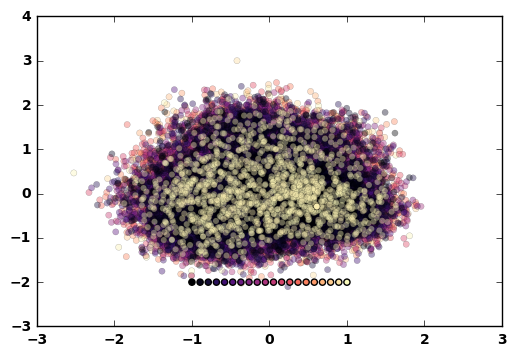

In [176]:
# timestamp에 따른 컨텐츠

dataNum = len(chosun_data)
timestamps = []
for i in range(dataNum):
    timestamps.append(chosun_data['publishedAt'].iloc[i].timestamp())
minTimestamp = min(timestamps)
maxTimestamp = max(timestamps)

timestamps = np.asarray(timestamps)
timestamps = (timestamps - minTimestamp) / (maxTimestamp - minTimestamp)

cmap = plt.get_cmap('magma')

plt.scatter(
    content_vectors_2d[:,0],
    content_vectors_2d[:,1],
    c=cmap(timestamps),
    alpha=0.4,
    lw=.2
)

t = np.linspace(0, 1, 20)
x = 2 * t - 1
y = [-2] * len(t)
plt.scatter(x, y, c=cmap(t))
plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


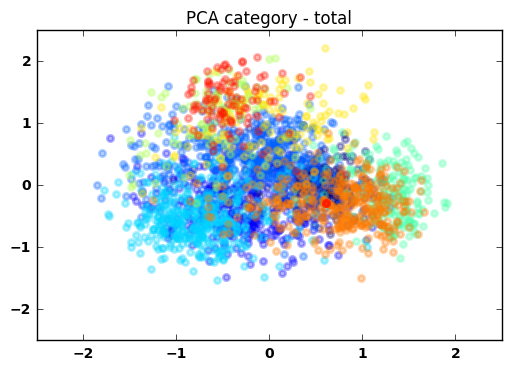

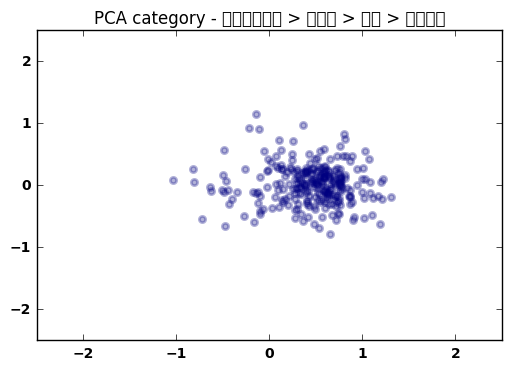

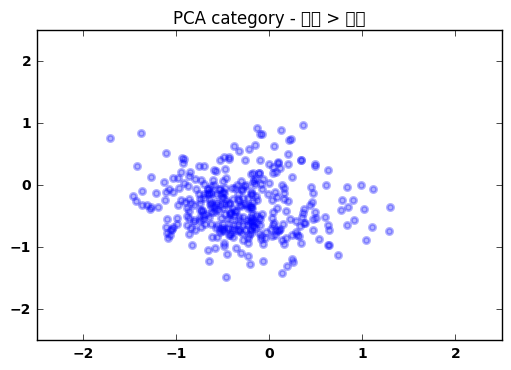

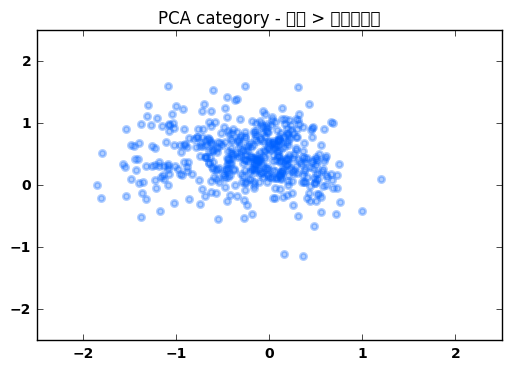

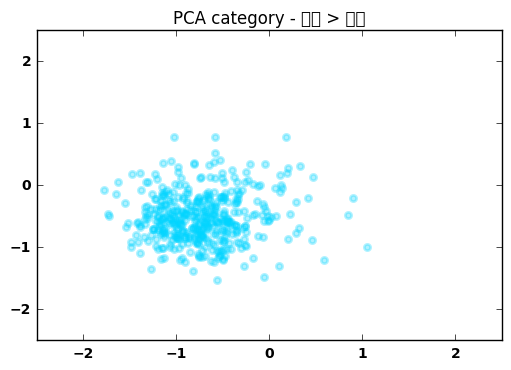

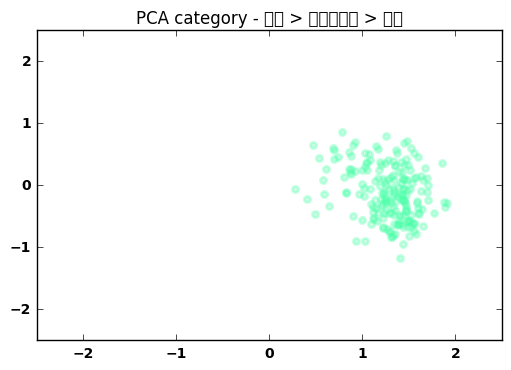

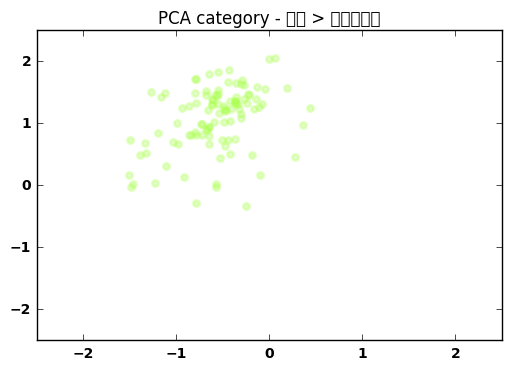

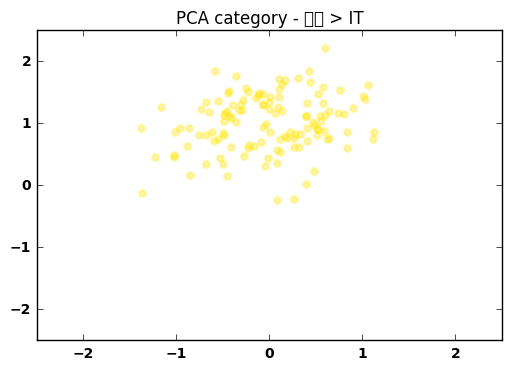

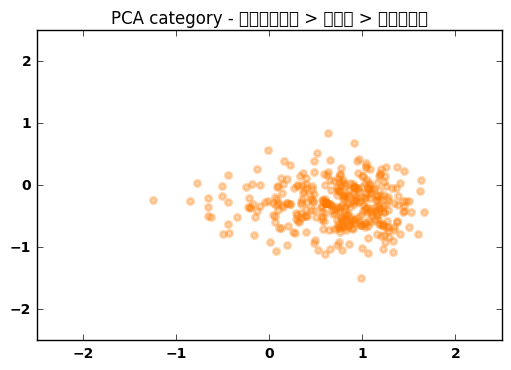

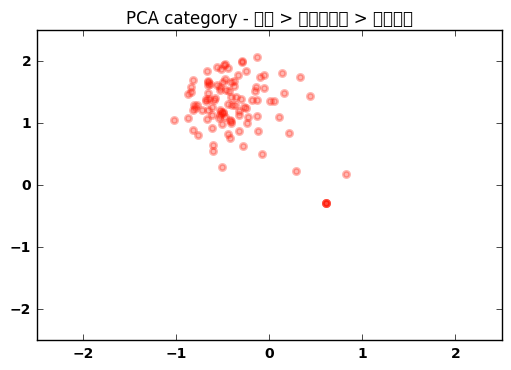

In [179]:
category_count = len(test_categories)

def show_category(indexes, label):
    category_list = chosun_data['category'].values
    fig = plt.figure()
    lw = 2

    cmap = plt.get_cmap('jet')

    for i in indexes:
        cate = test_categories[i]
        color = cmap(i / category_count)
        
        plt.scatter(
            content_vectors_2d[category_list == cate, 0],
            content_vectors_2d[category_list == cate, 1],
            color=color, alpha=.3, lw=lw
        )
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA category - %s' % label)
    plt.axis([-2.5, 2.5, -2.5, 2.5])
    plt.show()
    
show_category(range(category_count), 'total')
for cate in range(category_count):
    show_category([cate], test_categories[cate])

사회 > 카드뉴스
문화 > 오늘의 운세
스포츠ㆍ연예 > 스포츠 > 종합
nativeAD > 기업뉴스
사설ㆍ칼럼 > 내부칼럼 > 사설
사설ㆍ칼럼 > 외부칼럼 > 시론ㆍ기고 > 朝鮮칼럼 The Column
사설ㆍ칼럼 > 내부칼럼 > 만물상
사설ㆍ칼럼 > 외부칼럼 > 정민의 세설신어
사고 > 바로잡습니다
사회 > 교육ㆍ시험 > 중국어
사설ㆍ칼럼 > 리스트칼럼 > 전문기자칼럼
사설ㆍ칼럼 > 외부칼럼 > 시론ㆍ기고
사설ㆍ칼럼 > 내부칼럼 > 트렌드 돋보기
사설ㆍ칼럼 > 내부칼럼
사설ㆍ칼럼 > 외부칼럼 > 경제초점
사설ㆍ칼럼 > 외부칼럼 > 김기봉의 히스토리아
사설ㆍ칼럼 > 외부칼럼 > ESSAY
사설ㆍ칼럼 > 외부칼럼 > 가슴으로 읽는…
사설ㆍ칼럼 > 외부칼럼 > 발언대
스포츠ㆍ연예 > 엔터테인먼트 > TV/방송
스포츠ㆍ연예 > 스포츠 > 골프 > 여자해외골프
스포츠ㆍ연예 > 스포츠 > 배구
스포츠ㆍ연예 > 스포츠 > 종합 > 바둑
스포츠ㆍ연예 > 스포츠 > 축구 > 해외축구
스포츠ㆍ연예 > 스포츠 > 야구 > 프로야구
사고 > 조선일보 사고
사설ㆍ칼럼 > 외부칼럼 > 일사일언
사설ㆍ칼럼 > 내부칼럼 > 팔면봉
문화 > 더테이블
사회 > 두근두근 뇌 운동, 신문은 의사선생님
문화 > 생활ㆍ여성 > 패션
문화 > 종교ㆍ학술
문화
국제 > 중동ㆍ아프리카
국제 > 유럽
국제 > 미국ㆍ중남미
국제 > 아시아
국제
사회 > 리빙포인트
사회 > 의료ㆍ보건
사회 > 인물 > 동정
사회 > 인물 > 부음
사회 > 인물 > 인사
사회 > 인물 > 사람들
사회 > 전국뉴스 > 제주
사회 > 교통ㆍ관광ㆍ항공
사회 > 국방
사회 > 사건ㆍ사고
사회 > 날씨
사회 > 교육ㆍ시험 > 일본어
사회 > 교육ㆍ시험 > 생활한자
사회 > 교육ㆍ시험 > 영어
사회 > 교육ㆍ시험
사회 > 법원ㆍ검찰ㆍ경찰
사회
정치 > 나눔 통일
정치 > 청와대
정치 > 북한
정치
nativeAD > KT
nativeAD > LG전자
nativeAD > SK텔레콤
nativeAD > 포스코
nativeAD > 하나금융그룹

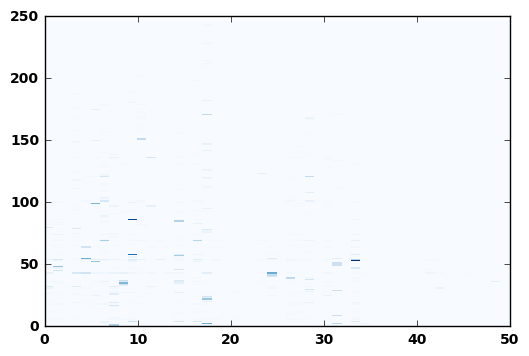

cluster -> cate


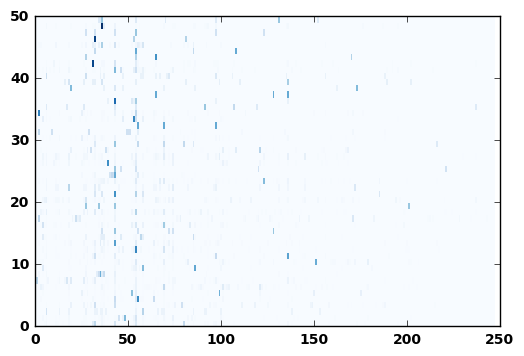

cate -> cluster


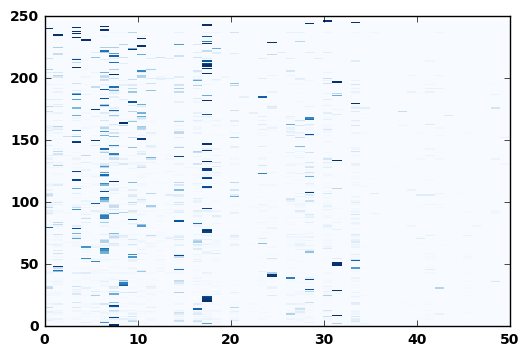

In [182]:
def print_clusterings():
    categories = chosun_data['category'].unique()
    for cate in categories:
        print(cate)
    
    print('raw')
    freq = []
    for category in categories:
        subfreq = [len(chosun_data[
                    (chosun_data.category == category) &
                    (cluster_model.labels_ == i)
                ]) for i in range(cluster_num)]
        freq.append(subfreq)

    freq = np.asarray(freq)
    plt.pcolor(freq, cmap='Blues')
    plt.show()

    print('cluster -> cate')
    freq = []
    for i in range(cluster_num):
        subfreq = [len(chosun_data[
                    (chosun_data.category == category) &
                    (cluster_model.labels_ == i)
                ]) for category in categories]
        totsubfreq = sum(subfreq)
        if totsubfreq == 0:
            totsubfreq = 1
        freq.append([sf / totsubfreq for sf in subfreq])

    freq = np.asarray(freq)
    plt.pcolor(freq, cmap='Blues')
    plt.show()
    
    print('cate -> cluster')
    freq = []
    for category in categories:
        subfreq = [len(chosun_data[
                    (chosun_data.category == category) &
                    (cluster_model.labels_ == i)
                ]) for i in range(cluster_num)]
        totsubfreq = sum(subfreq)
        if totsubfreq == 0:
            totsubfreq = 1
        freq.append([sf / totsubfreq for sf in subfreq])

    freq = np.asarray(freq)
    plt.pcolor(freq, cmap='Blues')
    plt.show()

print_clusterings()

5. Evaluation of clustering
---------------------------

In [183]:
from sklearn.metrics import adjusted_rand_score

cate_dict = {cate: i for i, cate in enumerate(test_categories)}
trueset = list(map(lambda x: cate_dict[x], chosun_data['category']))
ari = adjusted_rand_score(trueset, cluster_model.labels_)
ari

KeyError: '사회 > 카드뉴스'

6. 토크나이저 개선
==============

In [ ]:
import pprint as pp

text = '신제품 갤노트7 폭발 사건, 제품결함 아닌 외부 충격 탓"'
text = ' '.join(hanja.split_hanja(text))
text = hanja.translate(text, 'substitution')
print('[HN]', hannanum.nouns(text))
print('[MM]', mecab.morphs(text))
print('[MN]', mecab.nouns(text))
print('[MP]', mecab.pos(text))


7. Stub
=======

In [ ]:
end = if # Intentionally left errornous